In [58]:
from typing import Callable, Dict, Iterable, List, Optional, Tuple, Type, Union

import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import numpy.typing as npt
import pandas as pd

%matplotlib inline

# Лабораторная работа: Сравнение алгоритма A* с различными эвристиками

В данной лабораторной работе мы проведем сравнительный анализ эффективности алгоритма A* с различными эвристиками на разнообразных типах задач поиска пути. Задачи для тестирования взяты из базы данных [Moving AI Lab](https://movingai.com/benchmarks/grids.html).

## Структура эксперимента

### Карты
Используются три карты, представляющие собой прямоугольные поля из клеток. Каждая клетка может быть либо свободной, либо занятой препятствием.

### Задачи
- Для каждой карты выбрано 100 задач различной сложности
- Задачи равномерно распределены среди сценариев, доступных для каждой карты на сайте Moving AI Lab
- Каждая задача состоит из начальной и конечной клетки
- Цель: найти кратчайший путь между начальной и конечной клетками

### Правила перемещения
- Карты считаются 8-связными
- Возможны ходы влево, вправо, вверх, вниз и по диагонали
- Ход возможен только в свободную клетку
- Запрещено "срезать углы" препятствий при диагональном перемещении

## Цель эксперимента

Оценить и сравнить производительность различных вариантов алгоритма A* с разными эвристиками на выбранных картах и задачах.

## Выбранные карты для тестирования

Для тестирования были выбраны следующие карты: 

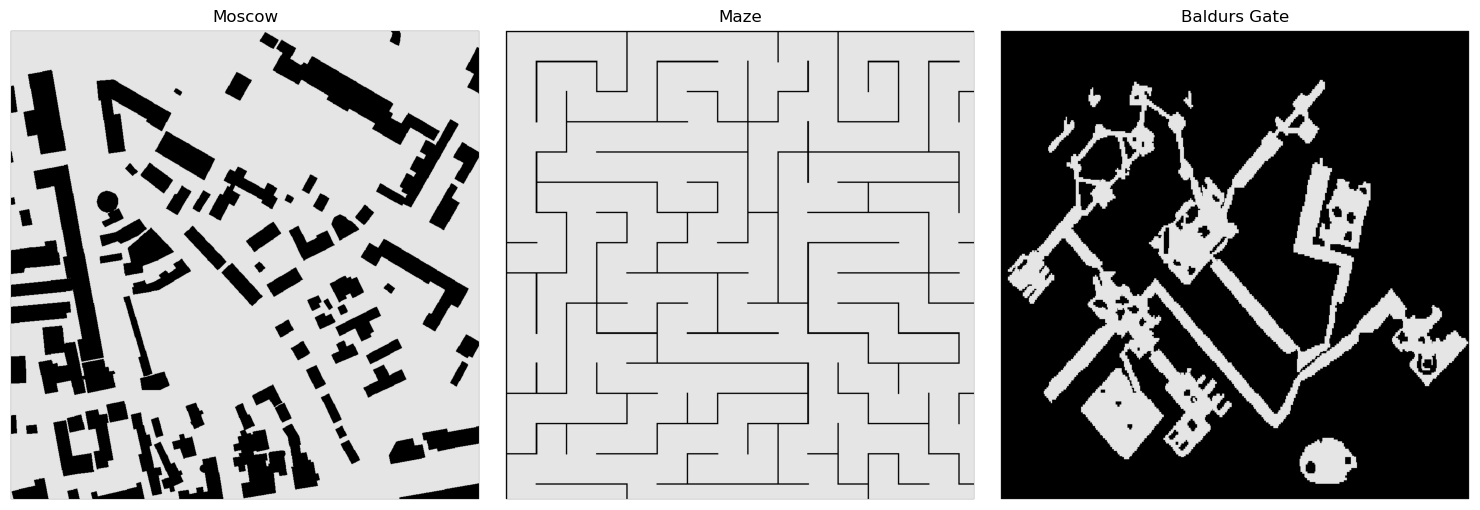

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

img1 = mpimg.imread('data/Moscow_1_1024.png')
img2 = mpimg.imread('data/maze512-32-7.png')
img3 = mpimg.imread('data/AR0307SR.png')

ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)

ax1.set_title('Moscow')
ax2.set_title('Maze')
ax3.set_title('Baldurs Gate')

for ax in (ax1, ax2, ax3):
    ax.axis('off')

plt.subplots_adjust(wspace=0.3)

plt.tight_layout()
plt.show()

## Описание карт

### Карта 1: Городская (часть Москвы)
Представляет собой фрагмент городской застройки, много свободного пространства и способов дойти от стартовой точки до конечной.

### Карта 2: Baldurs Gate
Отличается уникальной формой препятствий, образующих замкнутые области и длинные коридоры между ними. Для выхода из этих областей необходимо найти проход через окружающие препятствия и узкие места.

### Карта 3: Maze - лабиринт
Лабиринт квадратной формы, отличается прямыми поворотами и регулярностью структуры.

## Особенности тестирования

Разнообразие топологий карт обеспечивает:
- Объективность тестов
- Возможность сравнения алгоритмов между собой
- Оценку эффективности одного алгоритма на разных картах

Также мной были выбраны карты с сопоставимыми максимальными длинами оптимальных путей. Это помогает более наглядно сравнивать результаты работы алгоритмов на выбранных картах.

## Тестируемые варианты алгоритма A*

Алгоритм A* без перераскрытий с четырьмя эвристиками:
1. Евклидово расстояние
2. Диагональная метрика
3. Расстояние Чебышёва
4. Манхэттенское расстояние (недопустимая для 8-связной карты)

## Результаты

Далее представлены диаграммы и графики результатов тестирования. Подробный процесс получения этих результатов и код тестирования доступны в ячейках после графиков и анализа.

## График 1:
#### Доля правильно найденных путей для каждой метрики по картам

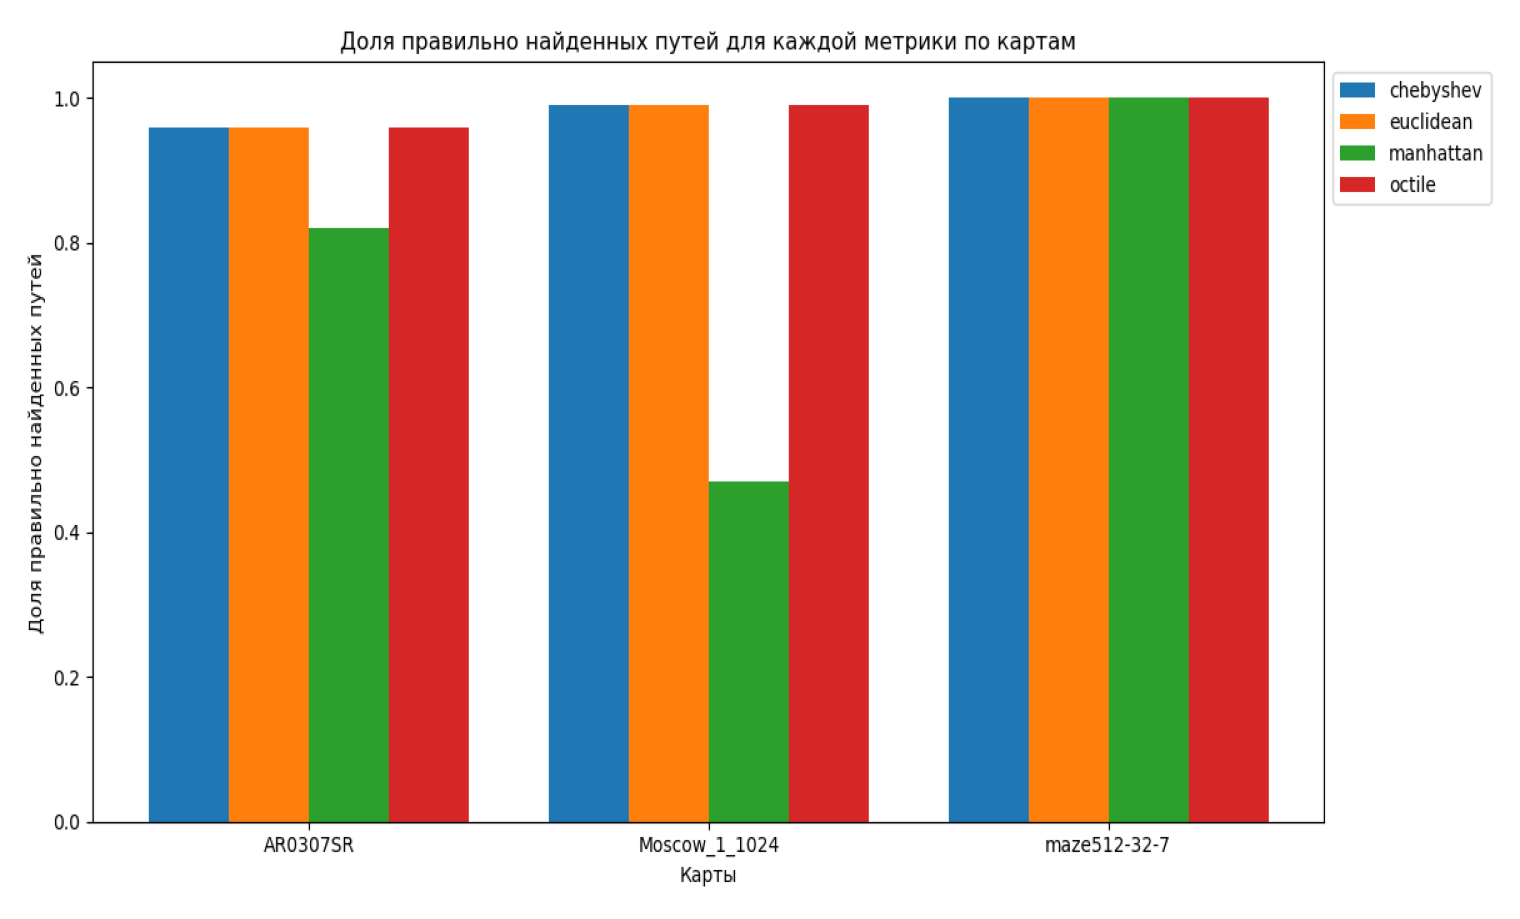

In [60]:
fig = plt.figure(figsize=(15, 9), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/success_rate.png'), aspect='auto')
plt.show()

Как видно из диаграммы, евклидова, диагональная и Чебышёвская эвристики решают все задачи правильно, как и ожидалось, так как они являются допустимыми. 

В то же время манхэттенская эвристика, будучи недопустимой, иногда приводит к неправильным ответам. На городской карте Москвы она справляется хуже всего, решая правильно лишь около половины задач. Это происходит, поскольку карта содержит довольно много открытых диагональных проходов, что мешает манхэттенской метрике работать корректно.

Также инетересно заметить, что манхэттенская эвристика справляется верно со всеми заданиями на лабиринте. Это происходит из-за того, что при пути между точками в лабиринте алгоритм будет передвигаться в основном под прямыми углами (в глобальном масштабе).

## Графики 2, 3, 4:
- #### Зависимость времени работы от сложности (длины оптимального пути) для разных метрик
- #### Зависимость времени работы от сложности (длины оптимального пути) для разных метрик с логарифмической шкалой
- #### Зависимость количества раскрытий вершин (шагов) от сложности (длины оптимального пути) для разных метрик

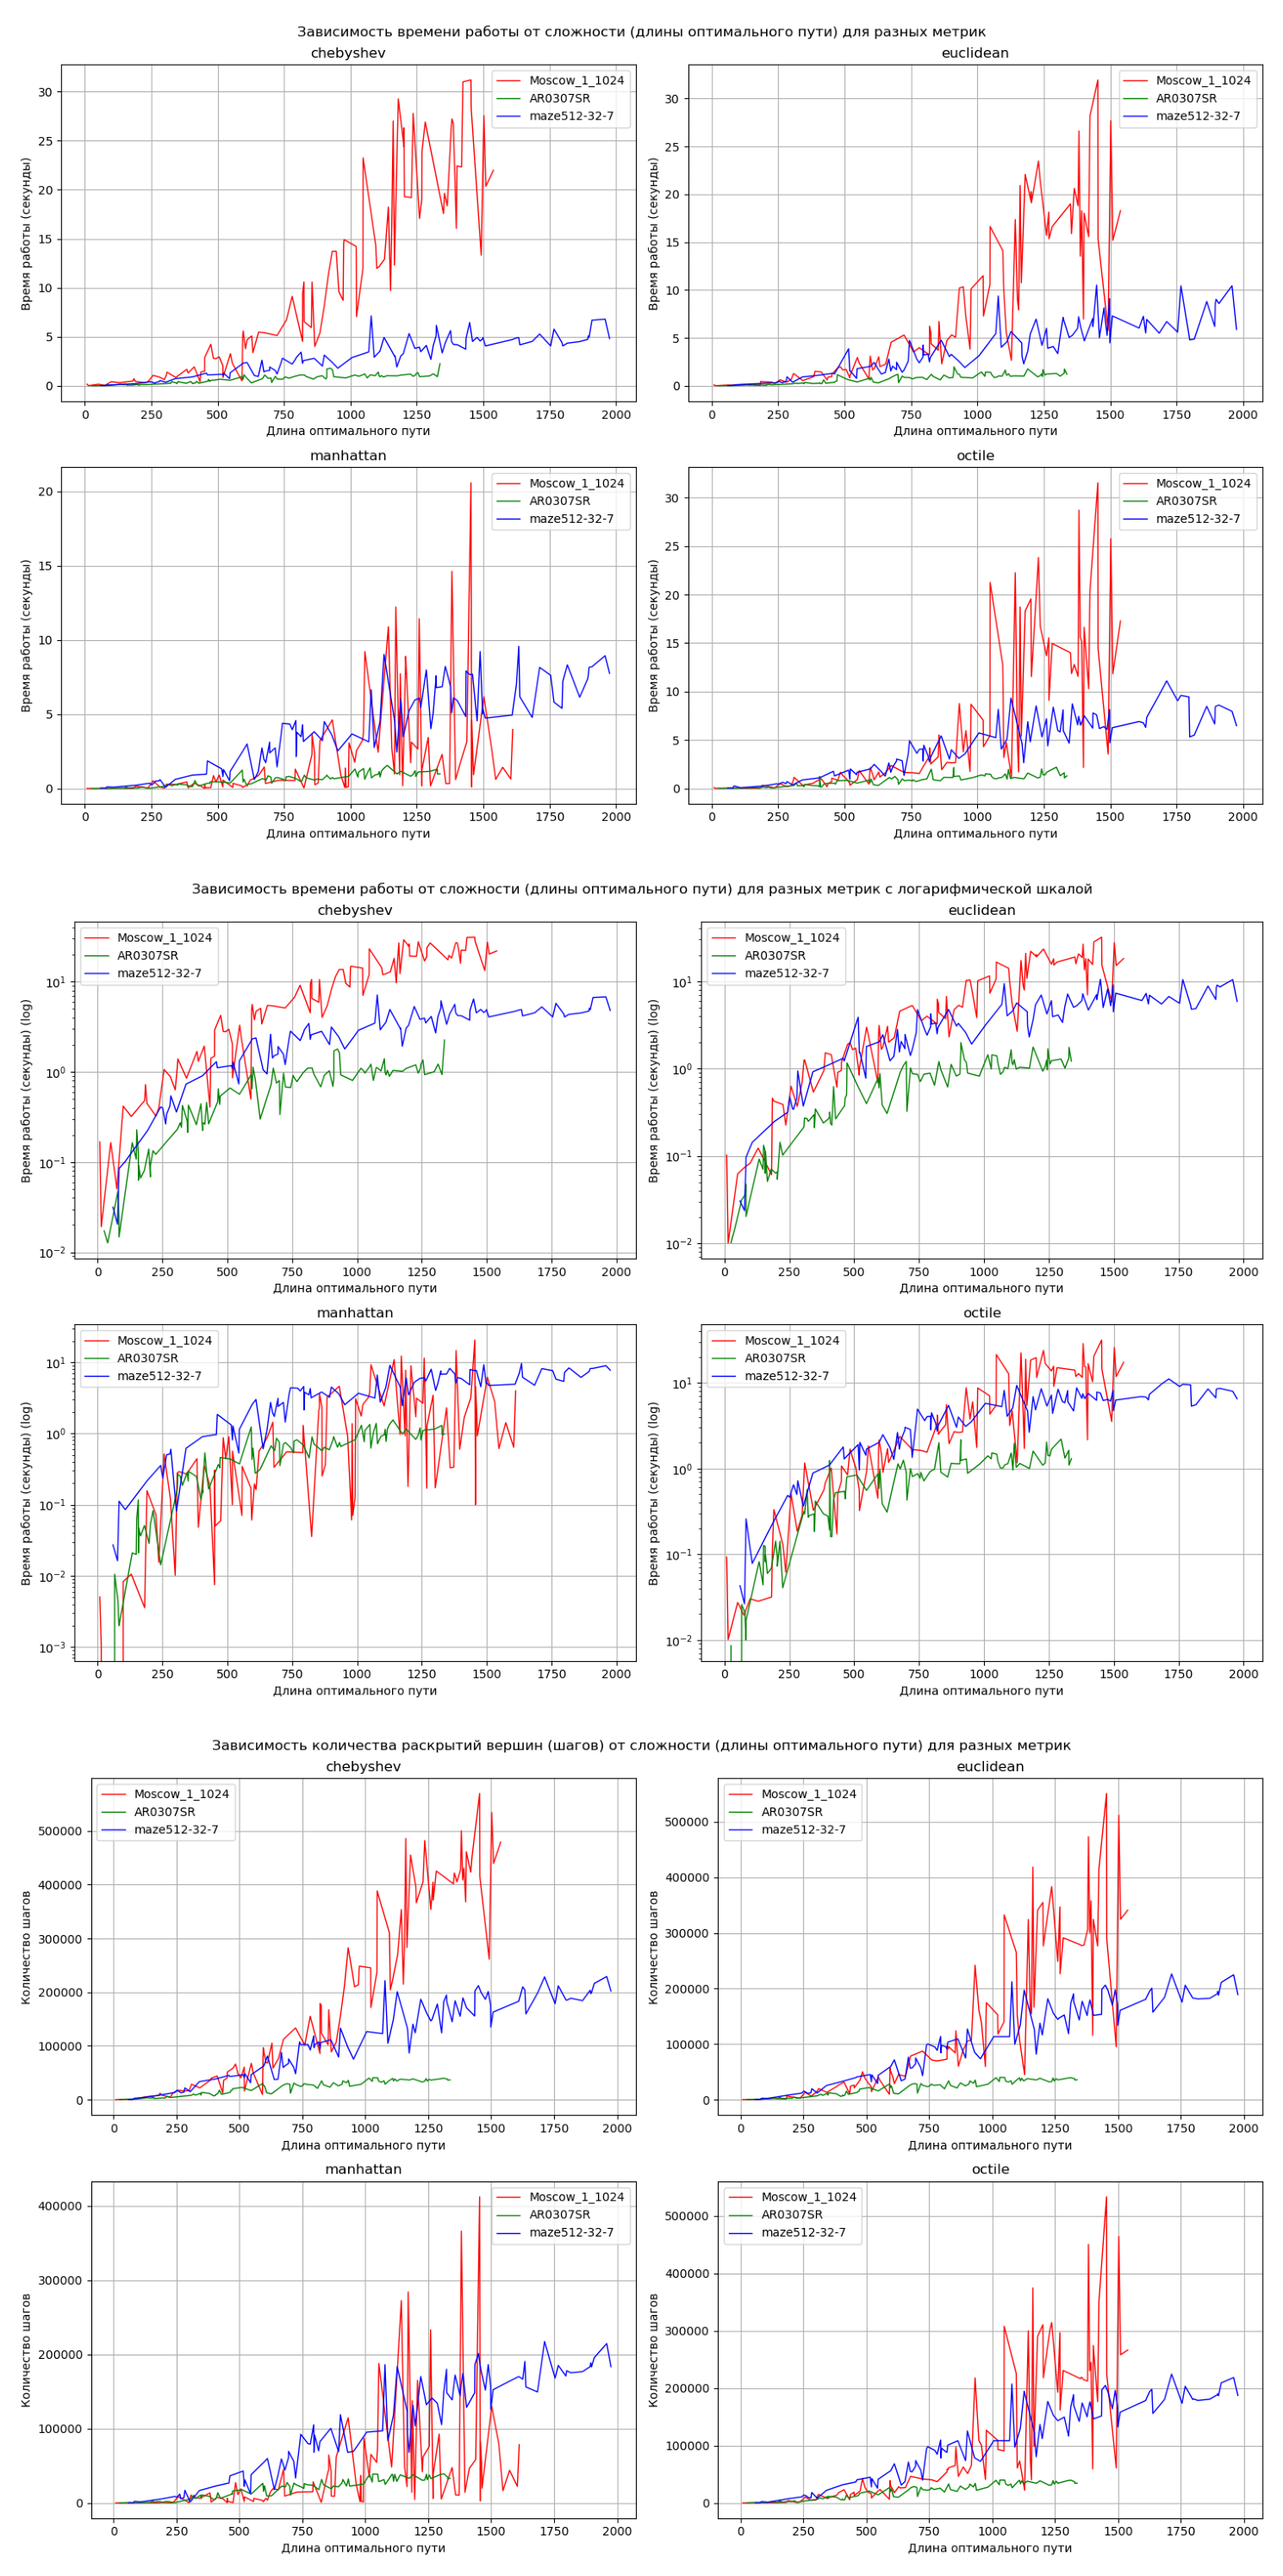

In [61]:
image_files = ['plots_png/time_length.png', 'plots_png/time_length_log.png', 'plots_png/steps_length.png']

fig, axs = plt.subplots(3, 1, figsize=(15, 30), frameon=False)

for ax in axs:
    ax.set_axis_off()

for i, image_file in enumerate(image_files):
    img = mpimg.imread(image_file)
    axs[i].imshow(img, aspect='auto')

plt.tight_layout()
plt.show()

Как можно видеть из представленных графиков, все 3 допустимых эвристики обеспечивают сопоставимую скорость работы и количество шагов на одинаковых картах. При этом алгоритм с манхэттенской эвристикой зачастую работает быстрее прочих, в особенности на городской карте, однако, как мы уже убедились, не выдает при этом кратчайший путь. Возможно, манхэттенская эвристика при этом обеспечивает хорошее приближение правильного пути, позволяя получить путь, близкий к оптимальному за меньшее время (данные, подтверждающие это, представлены на графике 8).

Также из графиков можно заметить, как особенности карт влияют на скорость работы алгоритма. Открытость и обилие свободного пространства на городской карте значительно увеличивают число открываемых алгоритмом вершин, а как следствие и время работы. Карты с узкими двусторонними проходами напротив уменьшают количество раскрытий, особенно это заметно по карте из игры Baldurs Gate (AR0307SR), где много длинных коридоров без разветлений.

Для более подробного сравнения допустимых метрик на каждой карте обратимся к следующему графику:

## График 5:
#### Зависимость времени работы от сложности (длины оптимального пути) для разных карт, логарифмическая шкала, группировка по картам

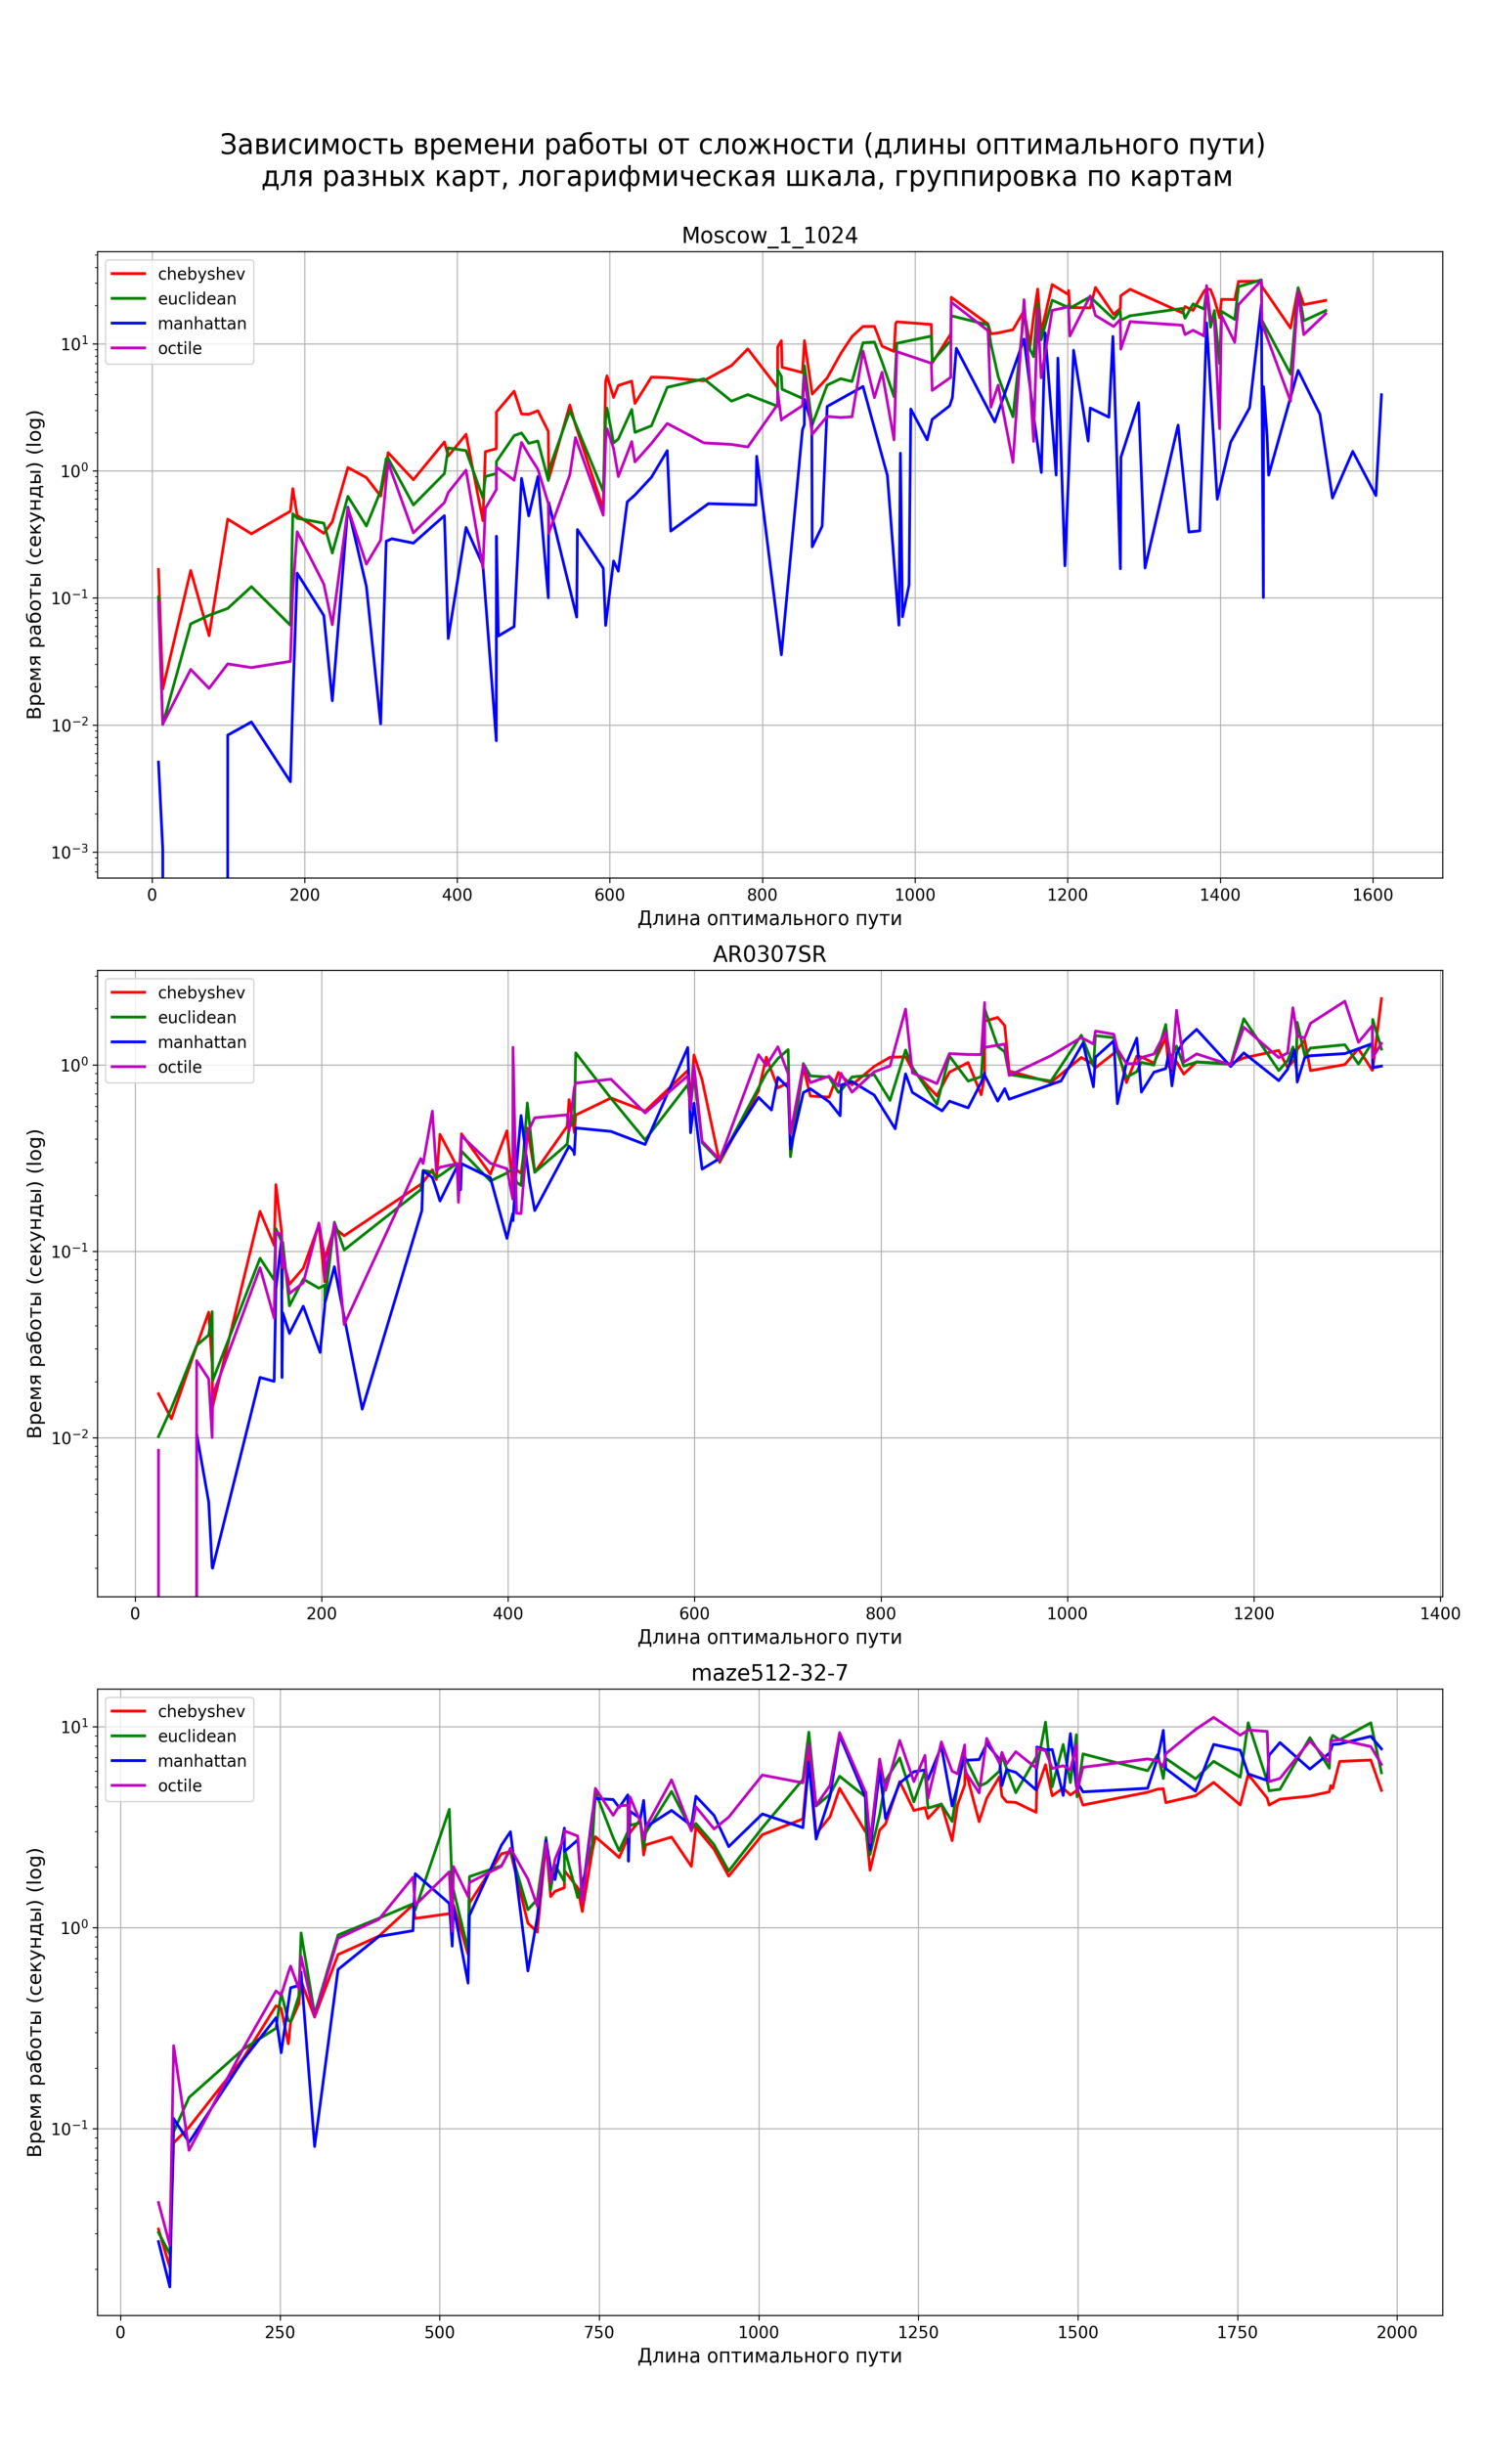

In [62]:
fig = plt.figure(figsize=(15, 25), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/time_length_log_map.png'), aspect='auto')
plt.show()

Сравнивая 3 допустимых эвристики, можно заметить, что диагональная (octile) эвристика проявляет себя несколько лучше других. Особенно это заметно на городской карте.

## Графики 6, 7:
- #### Статистика раскрытых вершин для разных карт (отдельно)
- #### Статистика раскрытых вершин для разных карт (вместе)

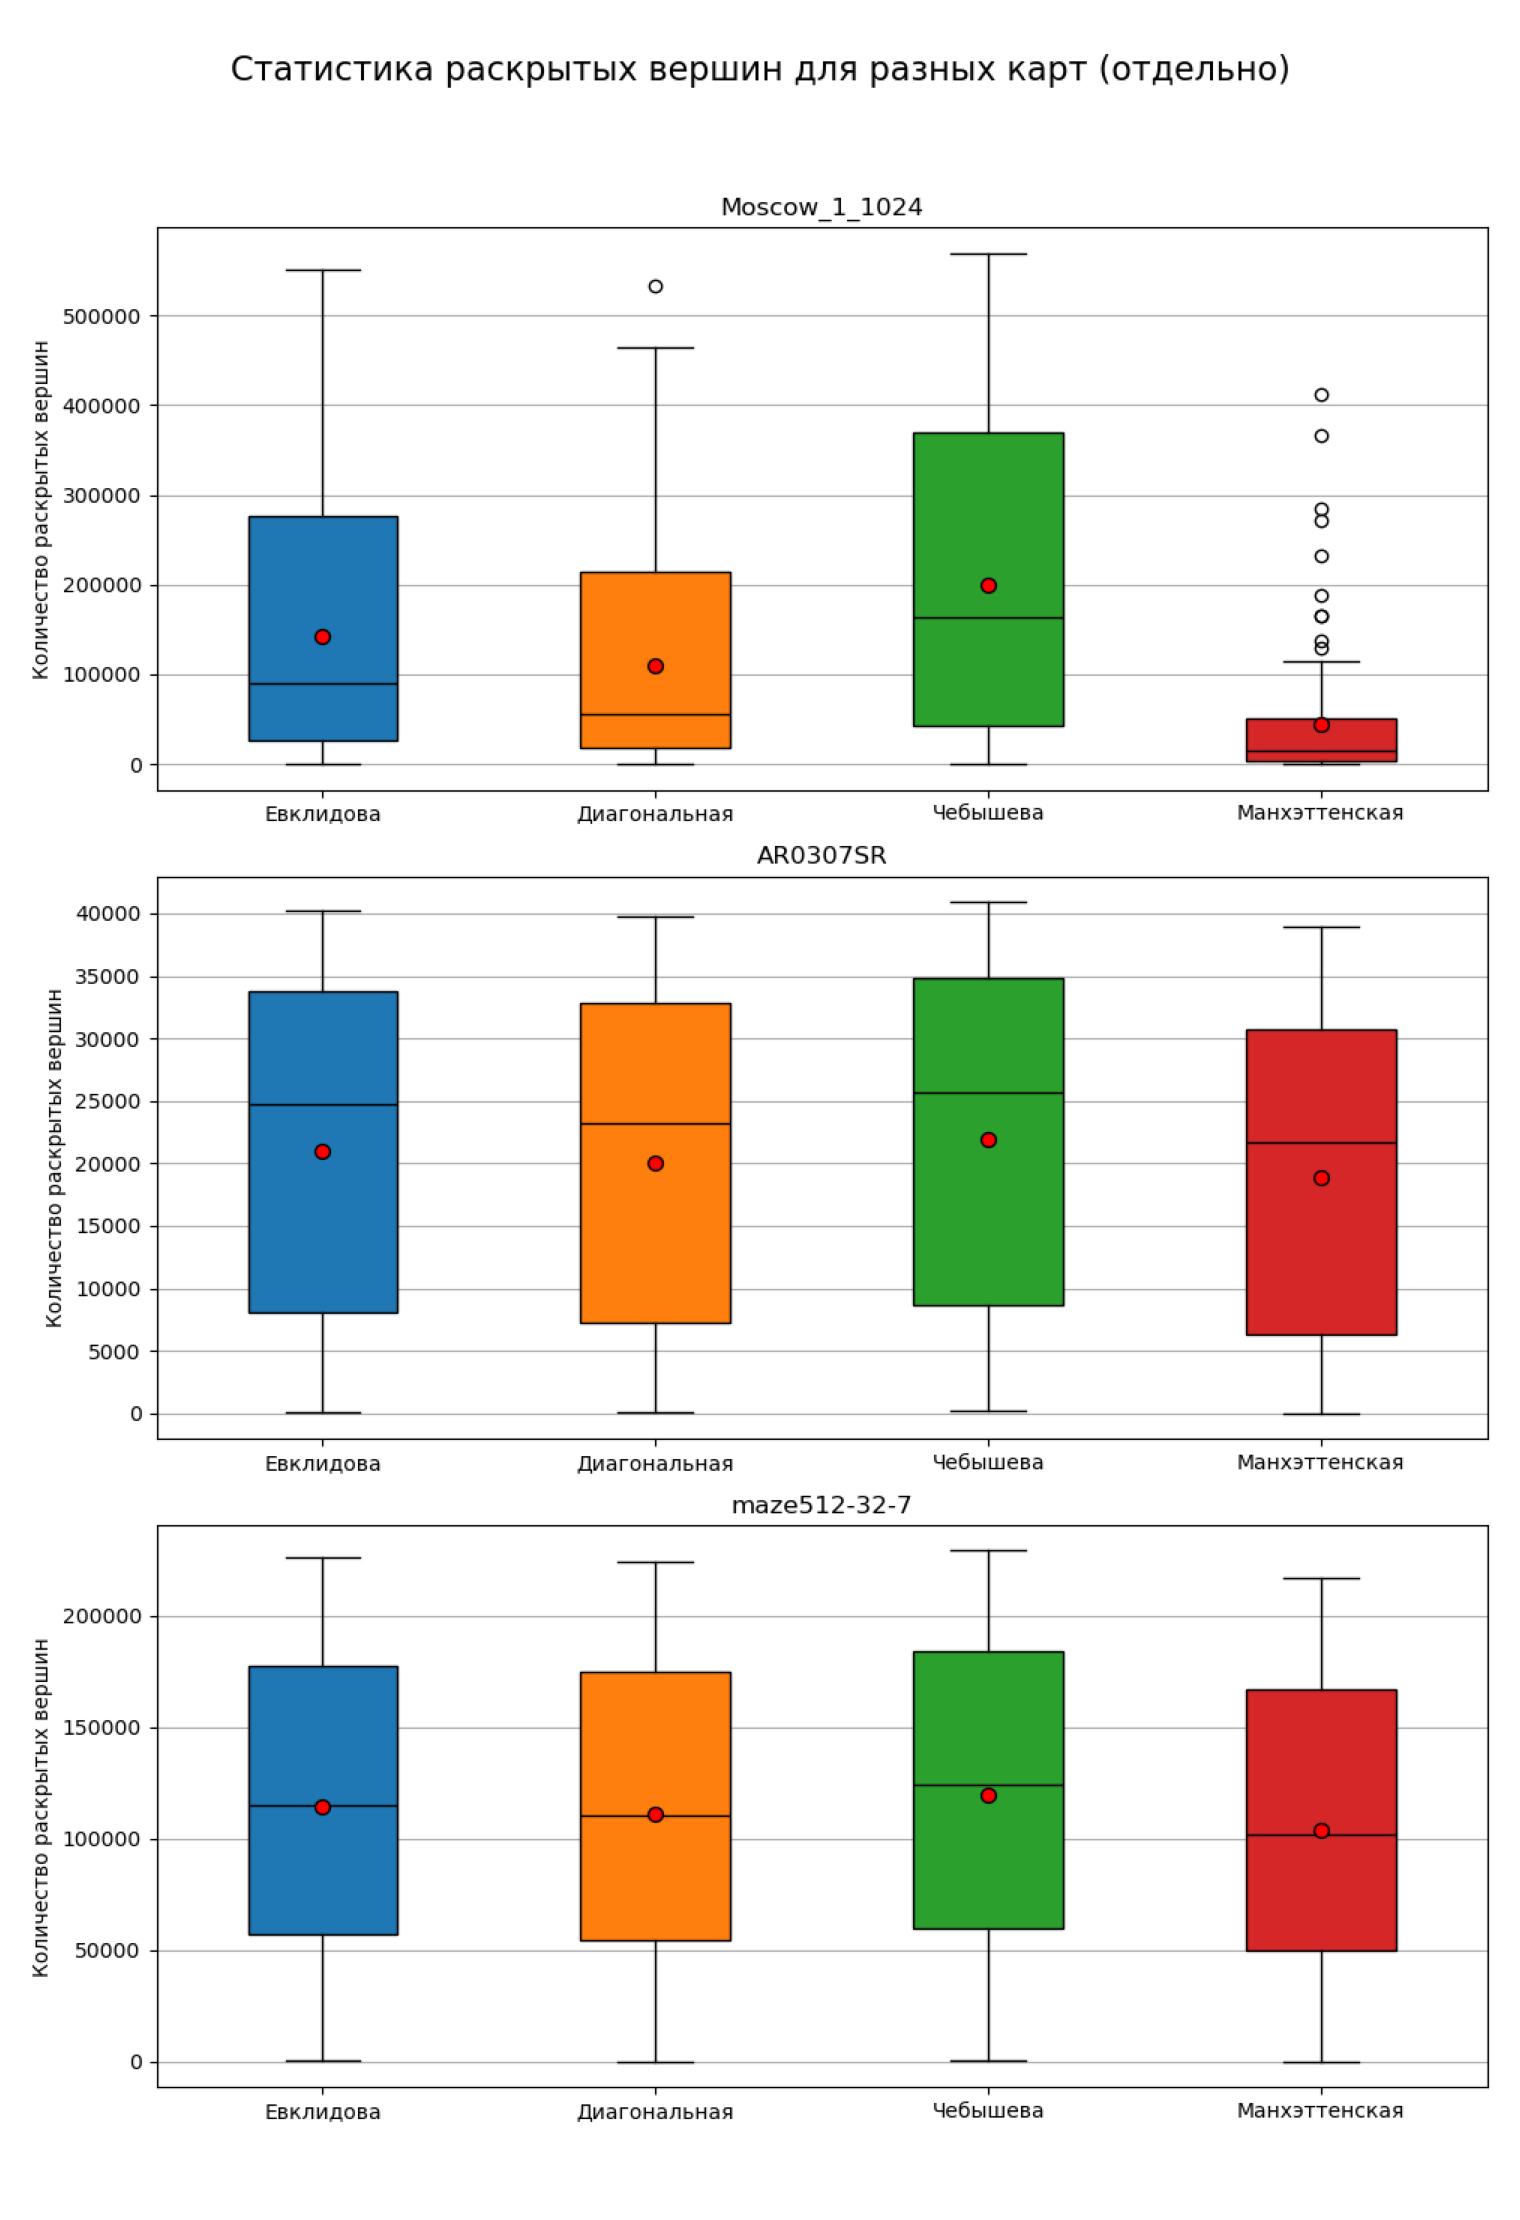

In [88]:
fig = plt.figure(figsize=(15, 22), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/steps3_boxplot_with_means.png'), aspect='auto')
plt.show()

Черная линия - медиана, красная точка - среднее

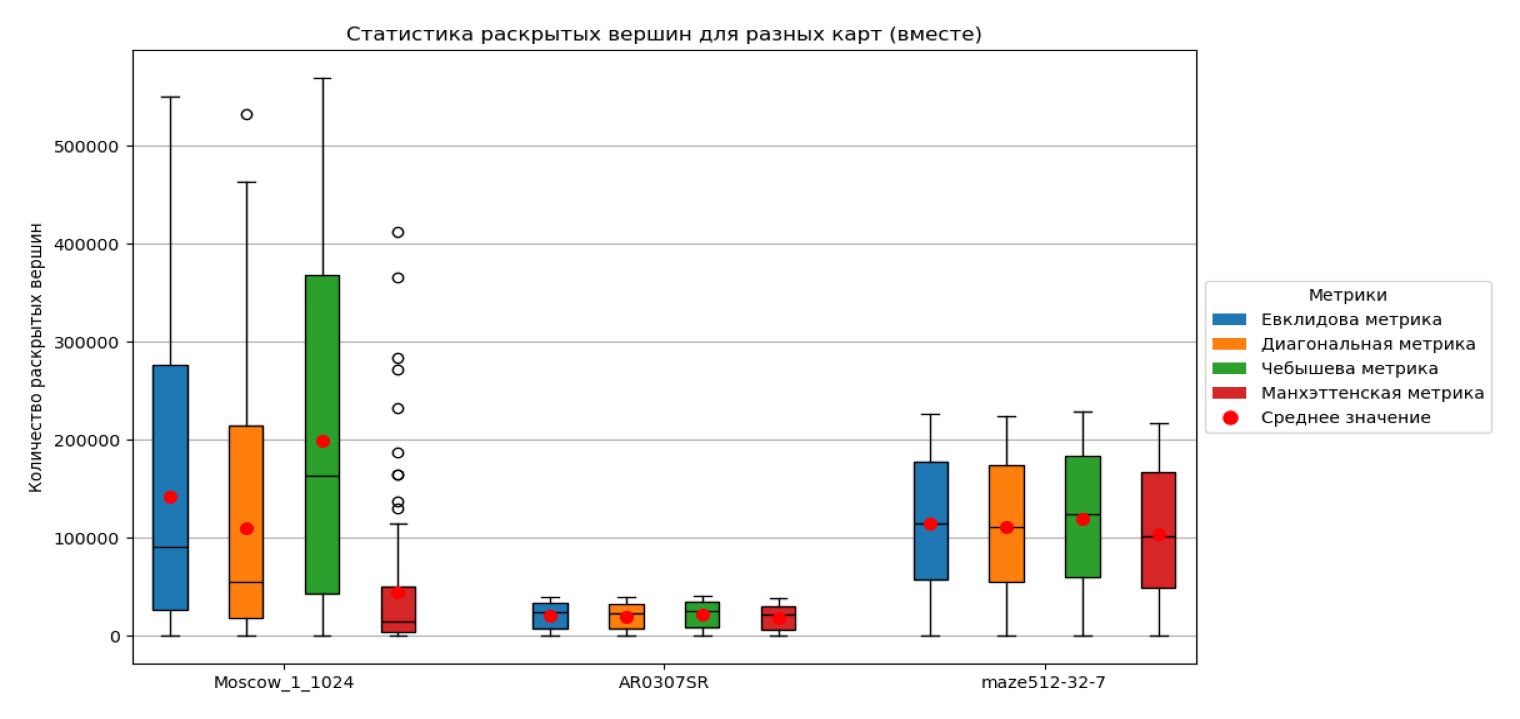

In [64]:
fig = plt.figure(figsize=(15, 7), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/steps1_boxplot_with_means.png'), aspect='auto')
plt.show()

Для большей наглядности в масштабе график "ящики с усами" представлен в двух вариантах. График с отображением всех трех карт вместе подтверждает выводы о влиянии особенностей разных карт на число раскрытий вершин.

График с отдельным сравнением по каждой карте позволяет еще раз сделать вывод о превосходстве диагональной эвристики над остальными допустимыми: для каждой из карт и среднее значение, и медиана количества открытых вершин для диагональной эвристики меньше, чем для евклидовой и Чебышёва.

Также мы можем наблюдать больший разброс в верхнюю сторону по количеству раскрытых вершин для городской карты в сравнении с другими.

## График 8:
#### Статистика ошибки для манхэттенской эвристики по картам

Напоследок вернемся к вопросу возможности использования недопустимой манхэттенской эвристики в качестве более быстрой и достаточно точной альтернативы. Для этого рассмотрим следующий график со статистикой ошибки длины найденного пути от оптимального пути в процентах (то есть модуль разницы длин найденного и оптимального пути делится на длину оптимального пути и домножается на 100).

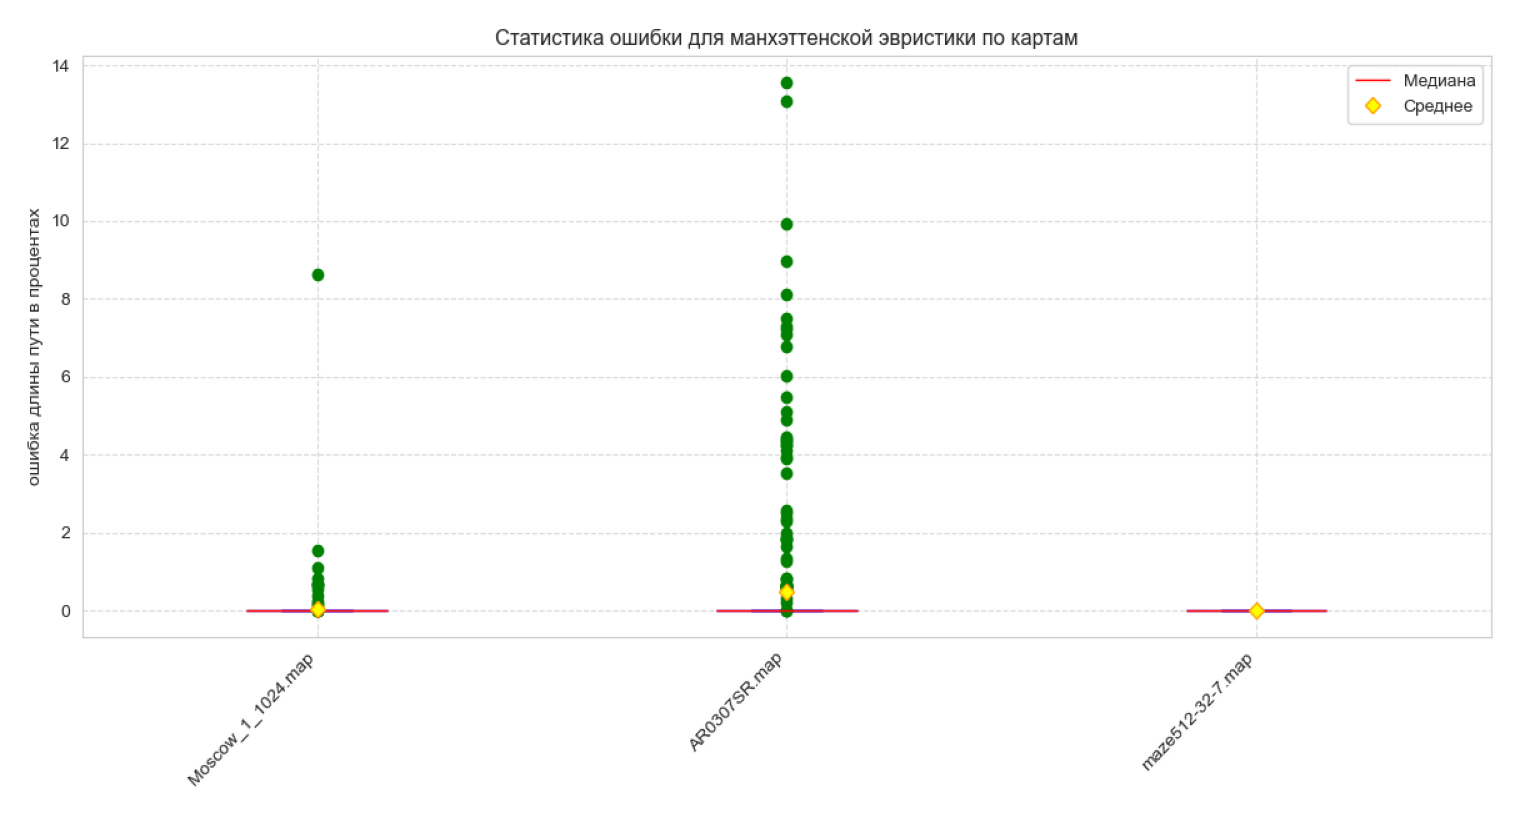

In [85]:
fig = plt.figure(figsize=(15, 8), frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

ax.imshow(mpimg.imread('plots_png/manhattan_loss.png'), aspect='auto')
plt.show()

Точные данные по картам в виде таблицы: 

| map               | mean     | median | std      | min | max       |
|:------------------|:---------|:-------|:---------|:----|:----------|
| AR0307SR.map      | 0.040725 | 0.0    | 0.448547 | 0.0 | 8.621407  |
| Moscow_1_1024.map | 0.465514 | 0.0    | 1.671772 | 0.0 | 13.554594 |
| maze512-32-7.map  | 0.0      | 0.0    | 0.000000 | 0.0 | 0.0       |

Исходя из этих данных мы можем сделать вывод о том, что Манхэттенская эвристика действительно может быть удачным выбором, если есть возможность размена точности вычисления оптимального пути на время работы алгоритма. Действительно, хотя пиковые значения отклонения от длины оптимального пути могут достигать 14 процентов на нашем наборе карт, но в каждом из случаев среднее значение ошибки не превышает половину процента, а значение медианы вообще равно 0 для каждой из карт. 

Однако данные выводы стоит воспринимать критически при иной топологии карт.

## Выводы

- #### Лучшей допустимой эвристикой показала себя диагональная эвристика.
- #### Манхэттенская эвристика, хоть и не является допустимой, но при этом обеспечивает значимый прирост в скорости работы и в среднем находит почти оптимальный по длине путь.

## Алгоритмическая часть

In [18]:
class Map:
    """
    Represents a square grid environment for our moving agent.

    Attributes
    ----------
    _width : int
        The number of columns in the grid.

    _height : int
        The number of rows in the grid.

    _cells : np.ndarray
        A binary matrix representing the grid where 0 represents a traversable cell, and 1 represents a blocked cell.
    """

    def __init__(self, cells: npt.NDArray):
        """
        Initializes the map using a 2D array of cells.

        Parameters
        ----------
        cells : np.ndarray
            A binary matrix representing the grid. 0 indicates a traversable cell, and 1 indicates a blocked cell.
        """
        self._width = cells.shape[1]
        self._height = cells.shape[0]
        self._cells = cells

    def in_bounds(self, i: int, j: int) -> bool:
        """
        Checks if the cell (i, j) is within the grid boundaries.

        Parameters
        ----------
        i : int
            Row number of the cell in the grid.
        j : int
            Column number of the cell in the grid.

        Returns
        ----------
        bool
            True if the cell is inside the grid, False otherwise.
        """
        return 0 <= j < self._width and 0 <= i < self._height

    def traversable(self, i: int, j: int) -> bool:
        """
        Checks if the cell (i, j) is not an obstacle.

        Parameters
        ----------
        i : int
            Row number of the cell in the grid.
        j : int
            Column number of the cell in the grid.

        Returns
        ----------
        bool
            True if the cell is traversable, False if it's blocked.
        """
        return not self._cells[i, j]

    def get_neighbors(self, i: int, j: int) -> List[Tuple[int, int]]:
        """
        Gets a list of neighboring cells as (i, j) tuples.
        Assumes that the grid is 4-connected, allowing moves only in cardinal directions.

        Parameters
        ----------
        i : int
            Row number of the cell in the grid.
        j : int
            Column number of the cell in the grid.

        Returns
        ----------
        neighbors : List[Tuple[int, int]]
            List of neighboring cells.
        """    
        neighbors = []
        delta_card = ((0, 1), (1, 0), (0, -1), (-1, 0))
        delta_diag = ((1, 1), (1, -1), (-1, 1), (-1, -1))
        
        for dx, dy in delta_card:
            ni, nj = i + dx, j + dy
            if self.in_bounds(ni, nj) and self.traversable(ni, nj):
                neighbors.append((ni, nj))
        
        for dx, dy in delta_diag:
            ni, nj = i + dx, j + dy
            if self.in_bounds(ni, nj) and self.traversable(ni, nj) and self.traversable(ni - dx, nj) and self.traversable(ni, nj - dy):
                neighbors.append((ni, nj))
        
        return neighbors

    def get_size(self) -> Tuple[int, int]:
        """
        Returns the size of the grid in cells.

        Returns
        ----------
        (height, width) : Tuple[int, int]
            Number of rows and columns in the grid.
        """
        return self._height, self._width

In [19]:
def convert_string_to_cells(cell_str: str) -> npt.NDArray:
    """
    Converts a string representation of a grid map, with '#' for obstacles and '.' for free cells, into a binary matrix.

    Parameters
    ----------
    cell_str : str
        String containing grid map information ('#' for obstacles and '.' for free cells).

    Returns
    ----------
    cells : np.ndarray
        Binary matrix representing the grid map.
    """
    lines = cell_str.replace(" ", "").split("\n")

    cells = np.array(
        [[1 if char == "@" else 0 for char in line] for line in lines if line],
        dtype=np.int8,
    )
    return cells

In [20]:
def compute_cost(i1: int, j1: int, i2: int, j2: int) -> Union[int, float]:
    """
    Computes the cost of simple moves between cells (i1, j1) and (i2, j2).

    Parameters
    ----------
    i1 : int
        Row number of the first cell in the grid.
    j1 : int
        Column number of the first cell in the grid.
    i2 : int
        Row number of the second cell in the grid.
    j2 : int
        Column number of the second cell in the grid.

    Returns
    ----------
    int | float
        Cost of the move between cells.

    Raises
    ----------
    ValueError
        If trying to compute the cost of a non-supported move (only cardinal moves are supported).
    """
    if abs(i1 - i2) + abs(j1 - j2) == 1:  # Cardinal move
        return 1
    elif abs(i1 - i2) + abs(j1 - j2) == 2:
        return 2 ** 0.5
    else:
        raise ValueError("Trying to compute the cost of a non-supported move! ONLY cardinal moves are supported.")

In [21]:
class Node:
    """
    Represents a search node.

    Attributes
    ----------
    i : int
        Row coordinate of the corresponding grid element.
    j : int
        Column coordinate of the corresponding grid element.
    g : float | int
        g-value of the node.
    h : float | int
        h-value of the node
    f : float | int
        f-value of the node
    parent : Node
        Pointer to the parent node.
    """

    def __init__(
        self,
        i: int,
        j: int,
        g: Union[float, int] = 0,
        h: Union[float, int] = 0,
        f: Optional[Union[float, int]] = None,
        parent: "Node" = None,
    ):
        """
        Initializes a search node.

        Parameters
        ----------
        i : int
            Row coordinate of the corresponding grid element.
        j : int
            Column coordinate of the corresponding grid element.
        g : float | int
            g-value of the node.
        h : float | int
            h-value of the node (always 0 for Dijkstra).
        f : float | int
            f-value of the node (always equal to g-value for Dijkstra).
        parent : Node
            Pointer to the parent node.
        """
        self.i = i
        self.j = j
        self.g = g
        self.h = h
        if f is None:
            self.f = self.g + h
        else:
            self.f = f
        self.parent = parent

    def __eq__(self, other):
        """
        Checks if two search nodes are the same, which is needed to detect duplicates in the search tree.
        """
        return self.i == other.i and self.j == other.j

    def __hash__(self):
        """
        Makes the Node object hashable, allowing it to be used in sets/dictionaries.
        """
        return hash((self.i, self.j))

    def __lt__(self, other):
        """
        Compares the keys (i.e., the f-values) of two nodes, needed for sorting/extracting the best element from OPEN.
        """
        return self.f < other.f

In [22]:
import heapq

class SearchTreePQD:
    """
    SearchTree using a priority queue for OPEN and a dictionary for CLOSED.
    """

    def __init__(self):
        self._open = []  # Priority queue for nodes in OPEN
        heapq.heapify(self._open)
        self._closed = dict()  # Dictionary for nodes in CLOSED (expanded nodes)
        self._enc_open_duplicates = 0  # Number of duplicates encountered in OPEN

    def __len__(self) -> int:
        """
        Returns the size of the search tree. Useful for assessing the memory
        footprint of the algorithm, especially at the final iteration.
        """
        return len(self._open) + len(self._closed)

    def open_is_empty(self) -> bool:
        """
        Checks if OPEN is empty.
        If true, the main search loop should be interrupted.
        """
        return len(self._open) == 0

    def add_to_open(self, item: Node):
        """
        Adds a node to the search tree, specifically to OPEN. This node is either
        entirely new or a duplicate of an existing node in OPEN.
        This implementation detects duplicates lazily; thus, nodes are added to
        OPEN without initial duplicate checks.
        """
        heapq.heappush(self._open, item)

    def get_best_node_from_open(self) -> Optional[Node]:
        """
        Retrieves the best node from OPEN, defined by the minimum key.
        This node will then be expanded in the main search loop.

        Duplicates are managed here. If a node has been expanded previously
        (and is in CLOSED), it's skipped and the next best node is considered.

        Returns None if OPEN is empty.
        """
        while not self.open_is_empty():
            if self.was_expanded(best_node := heapq.heappop(self._open)):
                self._enc_open_duplicates += 1      
            else:
                return best_node
                
        return None

    def add_to_closed(self, item: Node):
        """
        Adds a node to the CLOSED dictionary.
        """
        self._closed[(item.i, item.j)] = item

    def was_expanded(self, item: Node) -> bool:
        """
        Checks if a node has been previously expanded.
        """
        return (item.i, item.j) in self._closed

    @property
    def opened(self):
        return self._open

    @property
    def expanded(self):
        return self._closed.values()

    @property
    def number_of_open_duplicates(self):
        return self._enc_open_duplicates

In [23]:
def read_task_from_file(
    path: str,
    exp_num: int,
) -> Tuple[npt.NDArray, int, int, int, int, float, int]:
    """
    Reads map, start/goal positions, and true value of path length between the given start and goal from a file.

    Parameters
    ----------
    path : str
        Path to a file with the pathfinding problem instance.

    Returns
    -------
    cells : npt.NDArray
        Matrix of grid map cells.
    start_i, start_j : int, int
        Position of the start cell in the grid.
    goal_i, goal_j : int, int
        Position of the goal cell in the grid.
    length : float
        True value of the path's length between the given start and goal.
    """
    with open(path, 'r') as file:
        for i, line in enumerate(file, 1):
            if i == exp_num + 1:
                elements = line.strip().split('\t')
    
    _, map_name, width, height, start_x, start_y, goal_x, goal_y, optimal_length = elements
        
    width = int(width)
    height = int(height)
    start_i = int(start_y)
    start_j = int(start_x)
    goal_i = int(goal_y)
    goal_j = int(goal_x)
    length = float(optimal_length)
                
    return map_name, start_i, start_j, goal_i, goal_j, length, height

In [24]:
def manhattan_distance(i1: int, j1: int, i2: int, j2: int) -> int:
    """
    Computes the Manhattan distance between two cells on a grid.

    Parameters
    ----------
    i1, j1 : int
        (i, j) coordinates of the first cell on the grid.
    i2, j2 : int
        (i, j) coordinates of the second cell on the grid.

    Returns
    -------
    int
        Manhattan distance between the two cells.
    """
    return abs(i1 - i2) + abs(j1 - j2)

In [25]:
def euclidean_distance(i1: int, j1: int, i2: int, j2: int) -> float:
    """
    Computes the Euclidean distance between two cells on a grid.

    Parameters
    ----------
    i1, j1 : int
        (i, j) coordinates of the first cell on the grid.
    i2, j2 : int
        (i, j) coordinates of the second cell on the grid.

    Returns
    -------
    float
        Euclidean distance between the two cells.
    """
    return ((i1 - i2)**2 + (j1 - j2)**2)**0.5

In [26]:
def octile_distance(i1: int, j1: int, i2: int, j2: int) -> float:
    """
    Computes the Octile (diagonal) distance between two cells on a grid.

    Parameters
    ----------
    i1, j1 : int
        (i, j) coordinates of the first cell on the grid.
    i2, j2 : int
        (i, j) coordinates of the second cell on the grid.

    Returns
    -------
    float
        Octile distance between the two cells.
    """
    dx = abs(i1 - i2)
    dy = abs(j1 - j2)
    return max(dx, dy) + (2**0.5 - 1) * min(dx, dy)

In [27]:
def chebyshev_distance(i1: int, j1: int, i2: int, j2: int) -> int:
    """
    Computes the Chebyshev distance between two cells on a grid.

    Parameters
    ----------
    i1, j1 : int
        (i, j) coordinates of the first cell on the grid.
    i2, j2 : int
        (i, j) coordinates of the second cell on the grid.

    Returns
    -------
    int
        Chebyshev distance between the two cells.
    """
    return max(abs(i1 - i2), abs(j1 - j2))

In [28]:
def astar(
    task_map: Map,
    start_i: int,
    start_j: int,
    goal_i: int,
    goal_j: int,
    heuristic_func: Callable,
    search_tree: Type[SearchTreePQD],
) -> Tuple[bool, Optional[Node], int, int, Optional[Iterable[Node]], Optional[Iterable[Node]]]:
    """
    Implements the A* search algorithm.

    Parameters
    ----------
    task_map : Map
        The grid or map being searched.
    start_i, start_j : int, int
        Starting coordinates.
    goal_i, goal_j : int, int
        Goal coordinates.
    heuristic_func : Callable
        Heuristic function for estimating the distance from a node to the goal.
    search_tree : Type[SearchTreePQD]
        The search tree to use.

    Returns
    -------
    Tuple[bool, Optional[Node], int, int, Optional[Iterable[Node]], Optional[Iterable[Node]]]
        Tuple containing:
        - A boolean indicating if a path was found.
        - The last node in the found path or None.
        - Number of algorithm iterations.
        - Size of the resultant search tree.
        - OPEN set nodes for visualization or None.
        - CLOSED set nodes.
    """
    ast = search_tree()
    steps = 0

    start_node = Node(start_i, start_j, g=0, h=heuristic_func(start_i, start_j, goal_i, goal_j))
    ast.add_to_open(start_node)

    while not ast.open_is_empty():
        new_node = ast.get_best_node_from_open()
        
        if new_node is None:
            # print("During the search, the following number of OPEN duplicates was encountered: ", ast.number_of_open_duplicates)
            return False, None, steps, len(ast), None, ast.expanded
        
        steps += 1
        ast.add_to_closed(new_node)
        
        i, j = new_node.i, new_node.j
        
        if i == goal_i and j == goal_j:
            # print("During the search, the following number of OPEN duplicates was encountered: ", ast.number_of_open_duplicates)
            return True, new_node, steps, new_node.g, ast.opened, ast.expanded
        
        for ni, nj in task_map.get_neighbors(i, j):
            node_to_open = Node(ni, nj, g=new_node.g + compute_cost(i, j, ni, nj), 
                                h=heuristic_func(ni, nj, goal_i, goal_j), parent=new_node)
            if not ast.was_expanded(node_to_open):
                ast.add_to_open(node_to_open)

    return False, None, steps, len(ast), None, ast.expanded

## Эксперименты

In [30]:
np.random.seed(42)

tests = []

map_files = (('data/Moscow_1_1024.map.scen', 3871), ('data/AR0307SR.map.scen', 3381), ('data/maze512-32-7.map.scen', 4941))

for i in range(3):
    
    test_numbers = np.random.randint(0, map_files[i][1], 100)
    
    tests_params = []
    for test_number in test_numbers:
        map_name, start_i, start_j, goal_i, goal_j, length, height = read_task_from_file(map_files[i][0], test_number)
        params = {'start_i': start_i, 'start_j': start_j, 'goal_i': goal_i, 'goal_j': goal_j, 'length': length}
        tests_params.append(params)
    
    tests.append((map_name, height, tests_params))
    

In [31]:
def a_star_test(metric):
    
    test_results = pd.DataFrame(columns=['metric', 'map', 'exp_num', 'path_found', 'path_length', 'steps', 'runtime', 'path_dif'])
    
    for test_map, height, test_params in tests:
        
        with open('data/' + test_map) as map_file:
            for _ in range(4):
                next(map_file)
                    
            map_lines = [next(map_file) for _ in range(height)]
            map_str = "".join(map_lines)
            cells = convert_string_to_cells(map_str)

        exp_num = 0
        
        for params in test_params:
            exp_num += 1
            start_time = time.time()
            
            path_found, _, steps, path_length, _, _ = astar(
                task_map=Map(cells), 
                start_i=params['start_i'], 
                start_j=params['start_j'], 
                goal_i=params['goal_i'], 
                goal_j=params['goal_j'], 
                heuristic_func=metric,
                search_tree=SearchTreePQD
            )
            
            runtime = time.time() - start_time
            
            path_length = round(path_length, 5)
            
            if path_found and path_length == round(params['length'], 5):
                new_row = {'metric': metric.__name__, 
                           'map': test_map, 
                           'exp_num': exp_num, 
                           'path_found': 1, 
                           'path_length': path_length, 
                           'steps': steps, 
                           'runtime': runtime,
                           'path_dif': 0}
                test_results = pd.concat([test_results, pd.DataFrame([new_row])], ignore_index=True)
                
            else:
                new_row = {'metric': metric.__name__, 
                           'map': test_map, 
                           'exp_num': exp_num, 
                           'path_found': 0, 
                           'path_length': path_length, 
                           'steps': steps, 
                           'runtime': runtime,
                           'path_dif': abs(path_length - round(params['length'], 5))}
                test_results = pd.concat([test_results, pd.DataFrame([new_row])], ignore_index=True)
                                
    return test_results

In [32]:
from joblib import Parallel, delayed

metrics_list = (euclidean_distance, octile_distance, chebyshev_distance, manhattan_distance)

with Parallel(n_jobs=4, verbose=10) as parallel:
    results = parallel(delayed(a_star_test)(option) for option in metrics_list)
    
test_results = pd.concat(results, ignore_index=True)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed: 11.4min
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed: 19.7min remaining: 19.7min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed: 24.1min finished


## Построение графиков

### График 1

In [35]:
success_rates = (test_results.groupby(['map', 'metric'])
            .agg({'path_found': 'sum', 'metric': 'count'})
            .rename(columns={'metric': 'total_count'})
         )

success_rates['success_rate'] = success_rates['path_found'] / success_rates['total_count']

success_rates_array = success_rates['success_rate'].unstack().to_numpy()

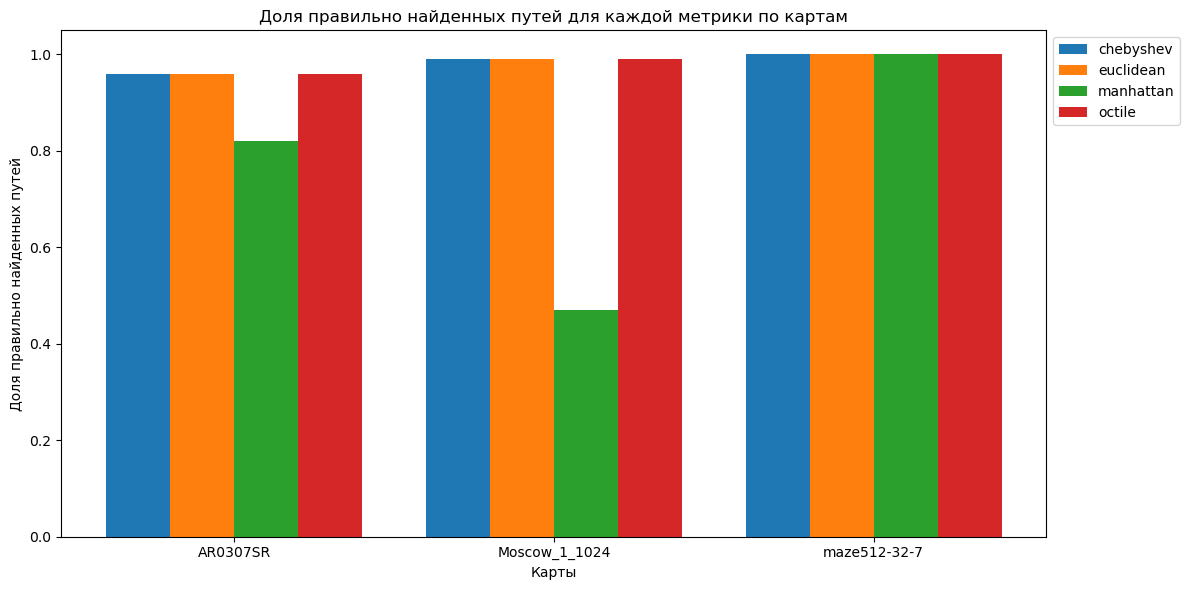

In [49]:
# Данные для графика
maps = ['AR0307SR', 'Moscow_1_1024', 'maze512-32-7']
metrics = ['chebyshev_distance', 'euclidean_distance', 'manhattan_distance', 'octile_distance']
values = success_rates_array

width = 0.2
x = np.arange(len(maps))

fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(metrics)):
    ax.bar(x + i*width, values[:, i], width, label=metrics[i].split('_')[0])

ax.set_ylabel('Доля правильно найденных путей')
ax.set_xlabel('Карты')
ax.set_title('Доля правильно найденных путей для каждой метрики по картам')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(maps)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('plots_png/success_rate.png')
plt.show()

### График 2

In [37]:
length_runtime_data = {}

for (metric, map_name), group in test_results.groupby(['metric', 'map']):
    sorted_data = group[['path_length', 'runtime']].sort_values('path_length').values
    length_runtime_data[(metric, map_name[:-4])] = sorted_data

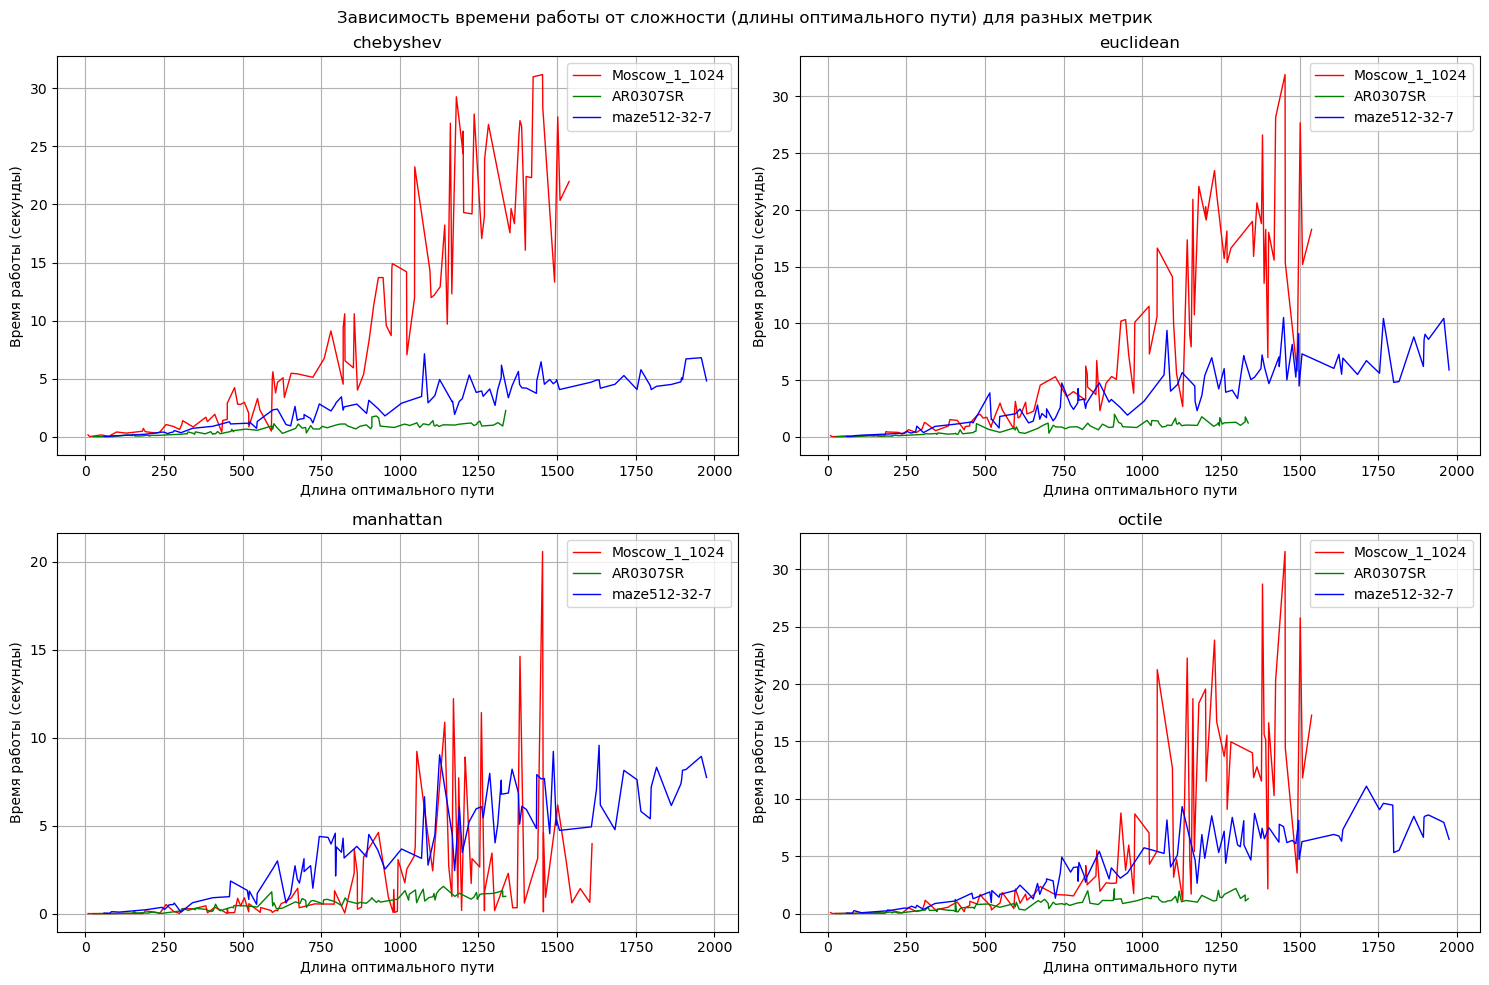

In [38]:
metrics = ['chebyshev_distance', 'euclidean_distance', 'manhattan_distance', 'octile_distance']
maps = ['Moscow_1_1024', 'AR0307SR', 'maze512-32-7']

data = length_runtime_data

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Зависимость времени работы от сложности (длины оптимального пути) для разных метрик')

colors = ['r', 'g', 'b']

for idx, metric in enumerate(metrics):
    ax = axs[idx // 2, idx % 2]
    for map_idx, map in enumerate(maps):
        x, y = data[(metric, map)].T
        ax.plot(x, y, color=colors[map_idx], label=map, linewidth=1)
    
    ax.set_xlabel('Длина оптимального пути')
    ax.set_ylabel('Время работы (секунды)')
    ax.set_title(metric.split('_')[0])
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig('plots_png/time_length.png')
plt.show()

### График 3

In [39]:
length_steps_data = {}

for (metric, map_name), group in test_results.groupby(['metric', 'map']):
    sorted_data = group[['path_length', 'steps']].sort_values('path_length').values
    length_steps_data[(metric, map_name[:-4])] = sorted_data

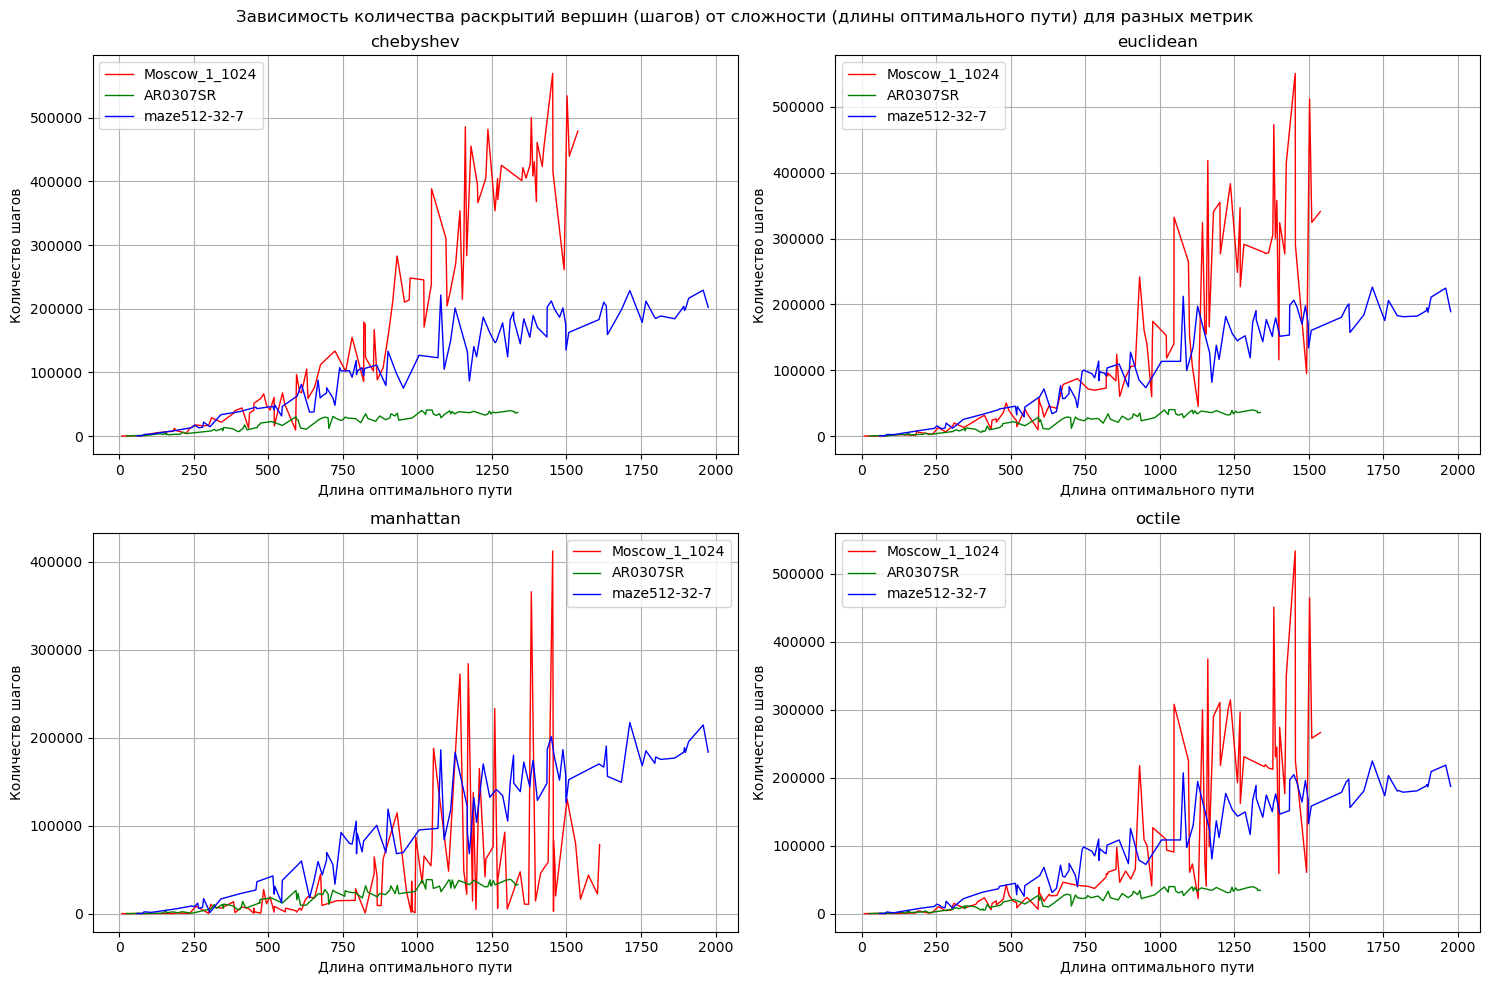

In [40]:
metrics = ['chebyshev_distance', 'euclidean_distance', 'manhattan_distance', 'octile_distance']
maps = ['Moscow_1_1024', 'AR0307SR', 'maze512-32-7']

data = length_steps_data

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Зависимость количества раскрытий вершин (шагов) от сложности (длины оптимального пути) для разных метрик')

colors = ['r', 'g', 'b']

for idx, metric in enumerate(metrics):
    ax = axs[idx // 2, idx % 2]
    for map_idx, map in enumerate(maps):
        x, y = data[(metric, map)].T
        ax.plot(x, y, color=colors[map_idx], label=map, linewidth=1)  # Уменьшаем толщину линии и убираем marker
    
    ax.set_xlabel('Длина оптимального пути')
    ax.set_ylabel('Количество шагов')
    ax.set_title(metric.split('_')[0])
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.savefig('plots_png/steps_length.png')
plt.show()

### График 4

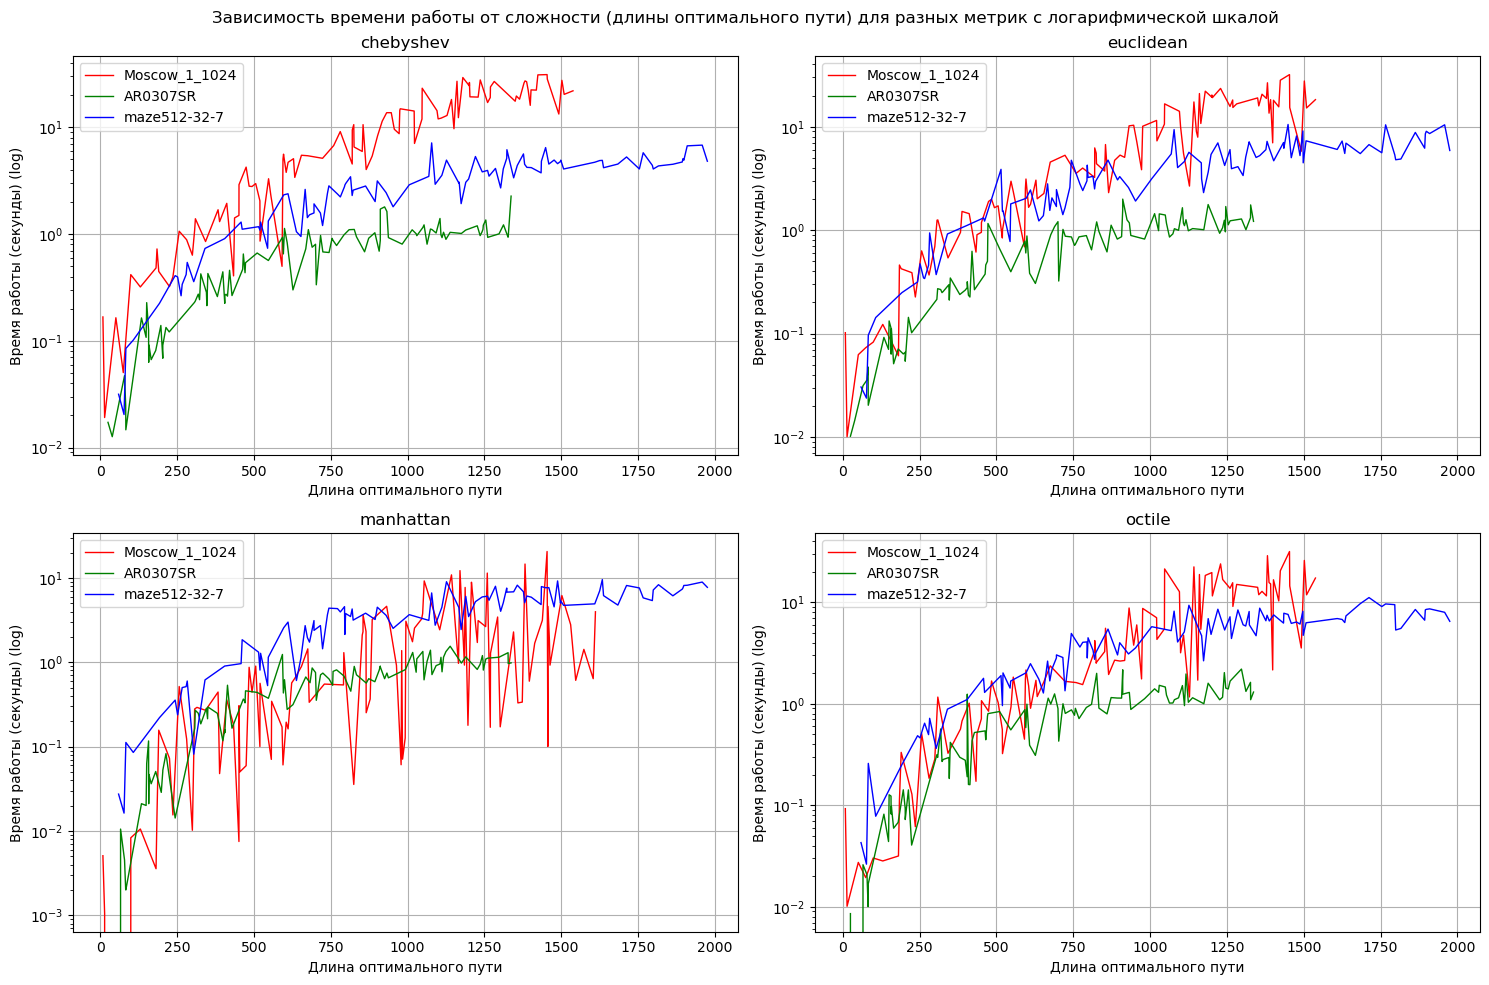

In [41]:
metrics = ['chebyshev_distance', 'euclidean_distance', 'manhattan_distance', 'octile_distance']
maps = ['Moscow_1_1024', 'AR0307SR', 'maze512-32-7']

data = length_runtime_data

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Зависимость времени работы от сложности (длины оптимального пути) для разных метрик с логарифмической шкалой')

colors = ['r', 'g', 'b']

for idx, metric in enumerate(metrics):
    ax = axs[idx // 2, idx % 2]
    for map_idx, map in enumerate(maps):
        x, y = data[(metric, map)].T
        ax.plot(x, y, color=colors[map_idx], label=map, linewidth=1)
    
    ax.set_xlabel('Длина оптимального пути')
    ax.set_ylabel('Время работы (секунды) (log)')
    ax.set_title(metric.split('_')[0])
    ax.legend()
    ax.grid(True)
    ax.set_yscale('log')

plt.tight_layout()
plt.savefig('plots_png/time_length_log.png')
plt.show()

### График 5

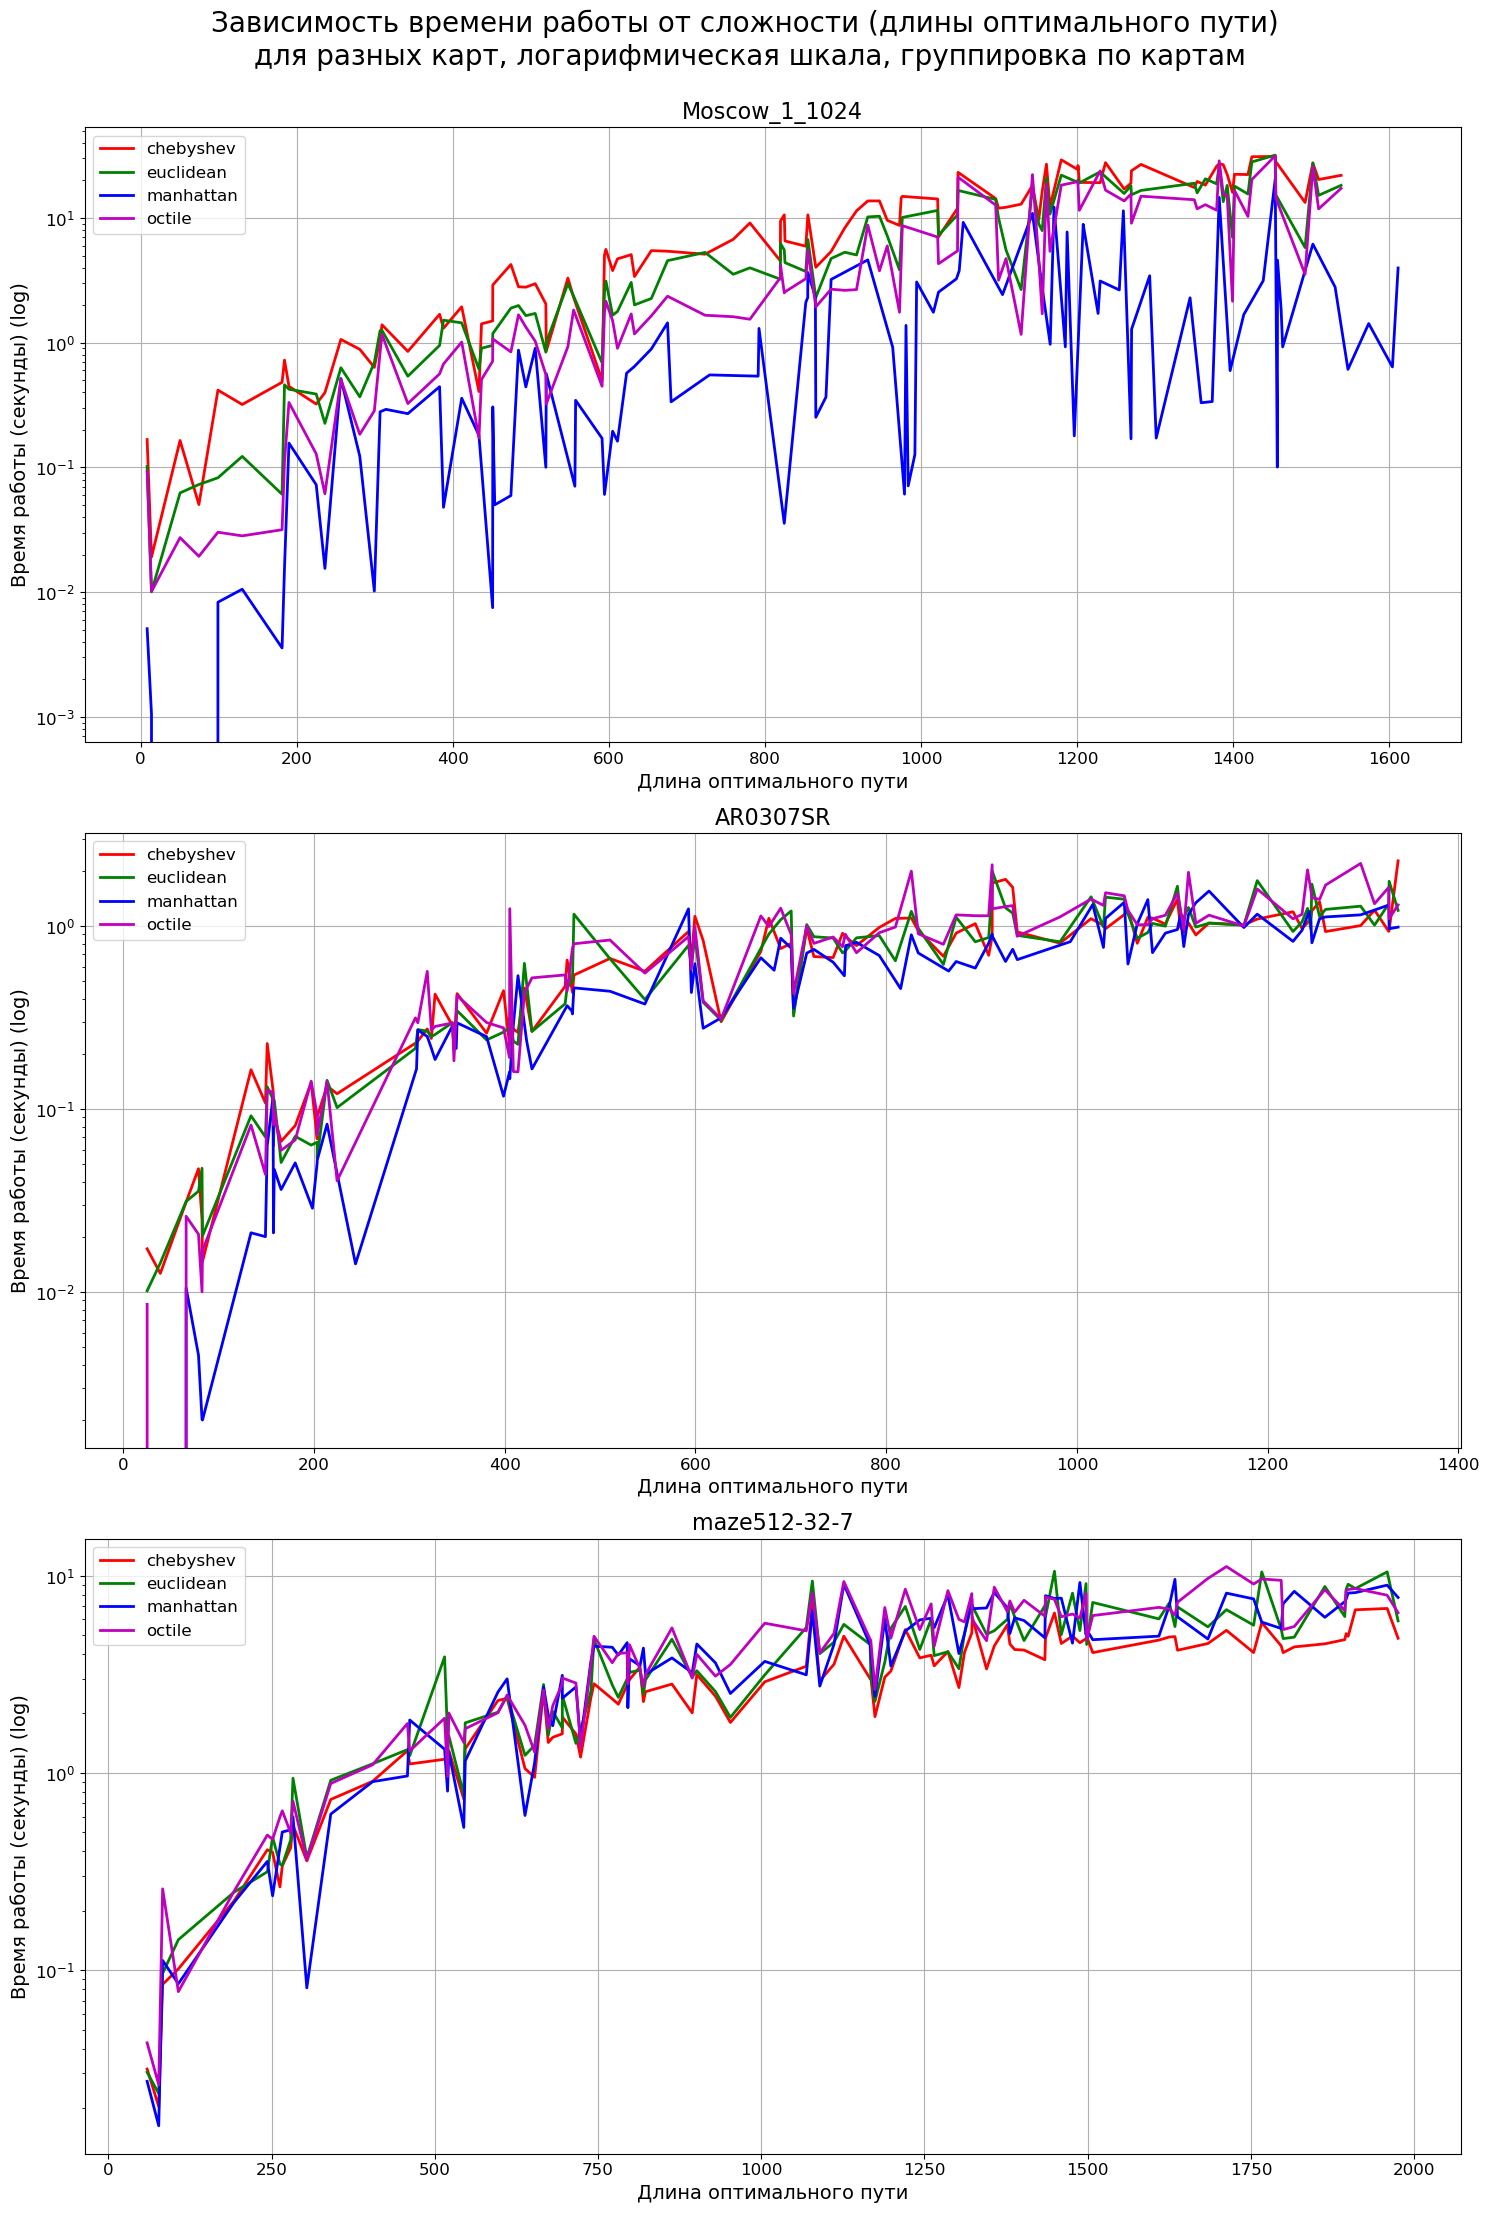

In [42]:
metrics = ['chebyshev_distance', 'euclidean_distance', 'manhattan_distance', 'octile_distance']
maps = ['Moscow_1_1024', 'AR0307SR', 'maze512-32-7']

data = length_runtime_data

fig, axs = plt.subplots(3, 1, figsize=(15, 24))
fig.suptitle('Зависимость времени работы от сложности (длины оптимального пути)\n для разных карт, логарифмическая шкала, группировка по картам', fontsize=20, y=0.95)

colors = ['r', 'g', 'b', 'm']

for idx, map in enumerate(maps):
    ax = axs[idx]
    for metric_idx, metric in enumerate(metrics):
        x, y = data[(metric, map)].T
        ax.plot(x, y, color=colors[metric_idx], label=metric.split('_')[0], linewidth=2)
    
    ax.set_xlabel('Длина оптимального пути', fontsize=14)
    ax.set_ylabel('Время работы (секунды) (log)', fontsize=14)
    ax.set_title(map, fontsize=16)
    ax.legend(fontsize=12)
    ax.grid(True)
    ax.set_yscale('log')
    
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots_png/time_length_log_map.png', dpi=300)
plt.show()

### График 6

In [78]:
test_results['loss_value'] = test_results['path_dif'] * 100 / (test_results['path_length'] - test_results['path_dif'])

grouped_data = [group['loss_value'].values for name, group in test_results.groupby('map')]
map_names = test_results['map'].unique()

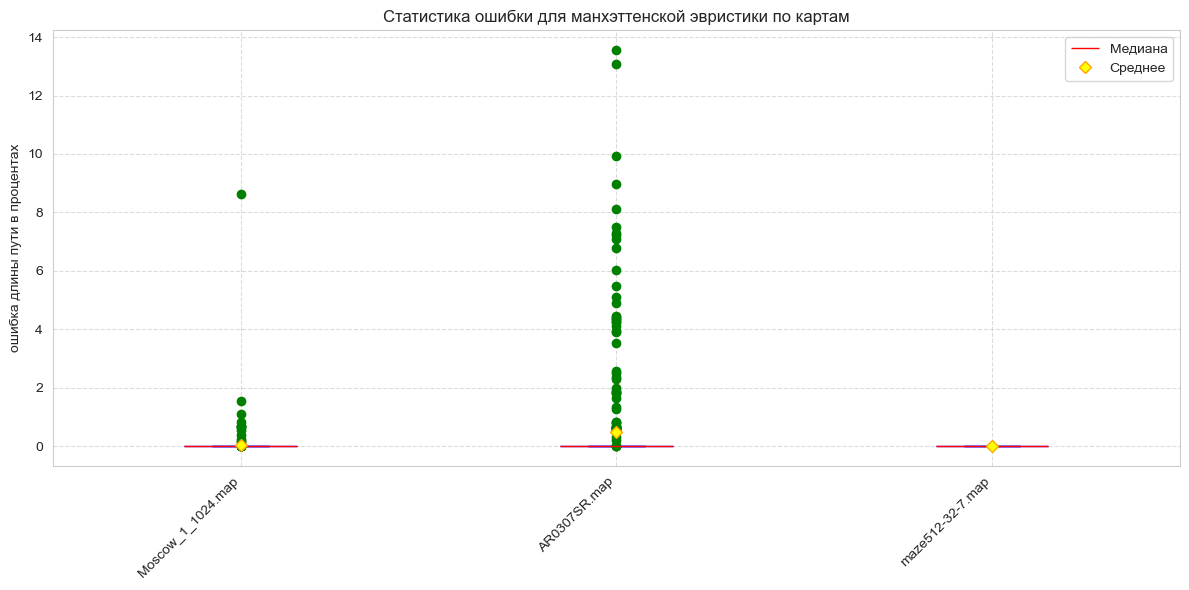

In [79]:
fig, ax = plt.subplots(figsize=(12, 6))

bp = ax.boxplot(grouped_data, patch_artist=True, showmeans=True)

for box in bp['boxes']:
    box.set_facecolor('lightblue')
    box.set_edgecolor('blue')
for whisker in bp['whiskers']:
    whisker.set_color('blue')
for cap in bp['caps']:
    cap.set_color('blue')
for median in bp['medians']:
    median.set_color('red')
for flier in bp['fliers']:
    flier.set_marker('o')
    flier.set_markerfacecolor('green')
    flier.set_markeredgecolor('green')
for mean in bp['means']:
    mean.set_marker('D')
    mean.set_markerfacecolor('yellow')
    mean.set_markeredgecolor('orange')

ax.set_xticklabels(map_names, rotation=45, ha='right')
ax.set_ylabel('ошибка длины пути в процентах')
ax.set_title('Статистика ошибки для манхэттенской эвристики по картам')

ax.legend([bp['medians'][0], bp['means'][0]], ['Медиана', 'Среднее'], loc='upper right')

ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('plots_png/manhattan_loss.png')  
plt.show()

In [80]:
test_results['loss_value'] = test_results['path_dif'] * 100 / (test_results['path_length'] - test_results['path_dif'])

stats = test_results.groupby('map')['loss_value'].agg(['mean', 'median', 'std', 'min', 'max'])

print(stats)

overall_stats = test_results['loss_value'].agg(['mean', 'median', 'std', 'min', 'max'])
print("\nОбщая статистика:")
print(overall_stats)

                       mean median       std  min        max
map                                                         
AR0307SR.map       0.040725    0.0  0.448547  0.0   8.621407
Moscow_1_1024.map  0.465514    0.0  1.671772  0.0  13.554594
maze512-32-7.map        0.0    0.0  0.000000  0.0        0.0

Общая статистика:
mean       0.168746
median     0.000000
std        1.020468
min        0.000000
max       13.554594
Name: loss_value, dtype: float64


### График 7

In [43]:
grouped = test_results.groupby(['map', 'metric'])

steps_grouped = {}

for map_name in test_results['map'].unique():
    metric_arrays = []
    
    for metric in ['euclidean_distance', 'octile_distance', 'chebyshev_distance', 'manhattan_distance']:
        steps = grouped.get_group((map_name, metric))['steps'].to_numpy()
        metric_arrays.append(steps)
    
    steps_grouped[map_name] = np.array(metric_arrays)

In [44]:
steps_grouped_tr = {}

for key, value in steps_grouped.items():
    transformed_arrays = [row for row in value]
    steps_grouped_tr[key] = transformed_arrays

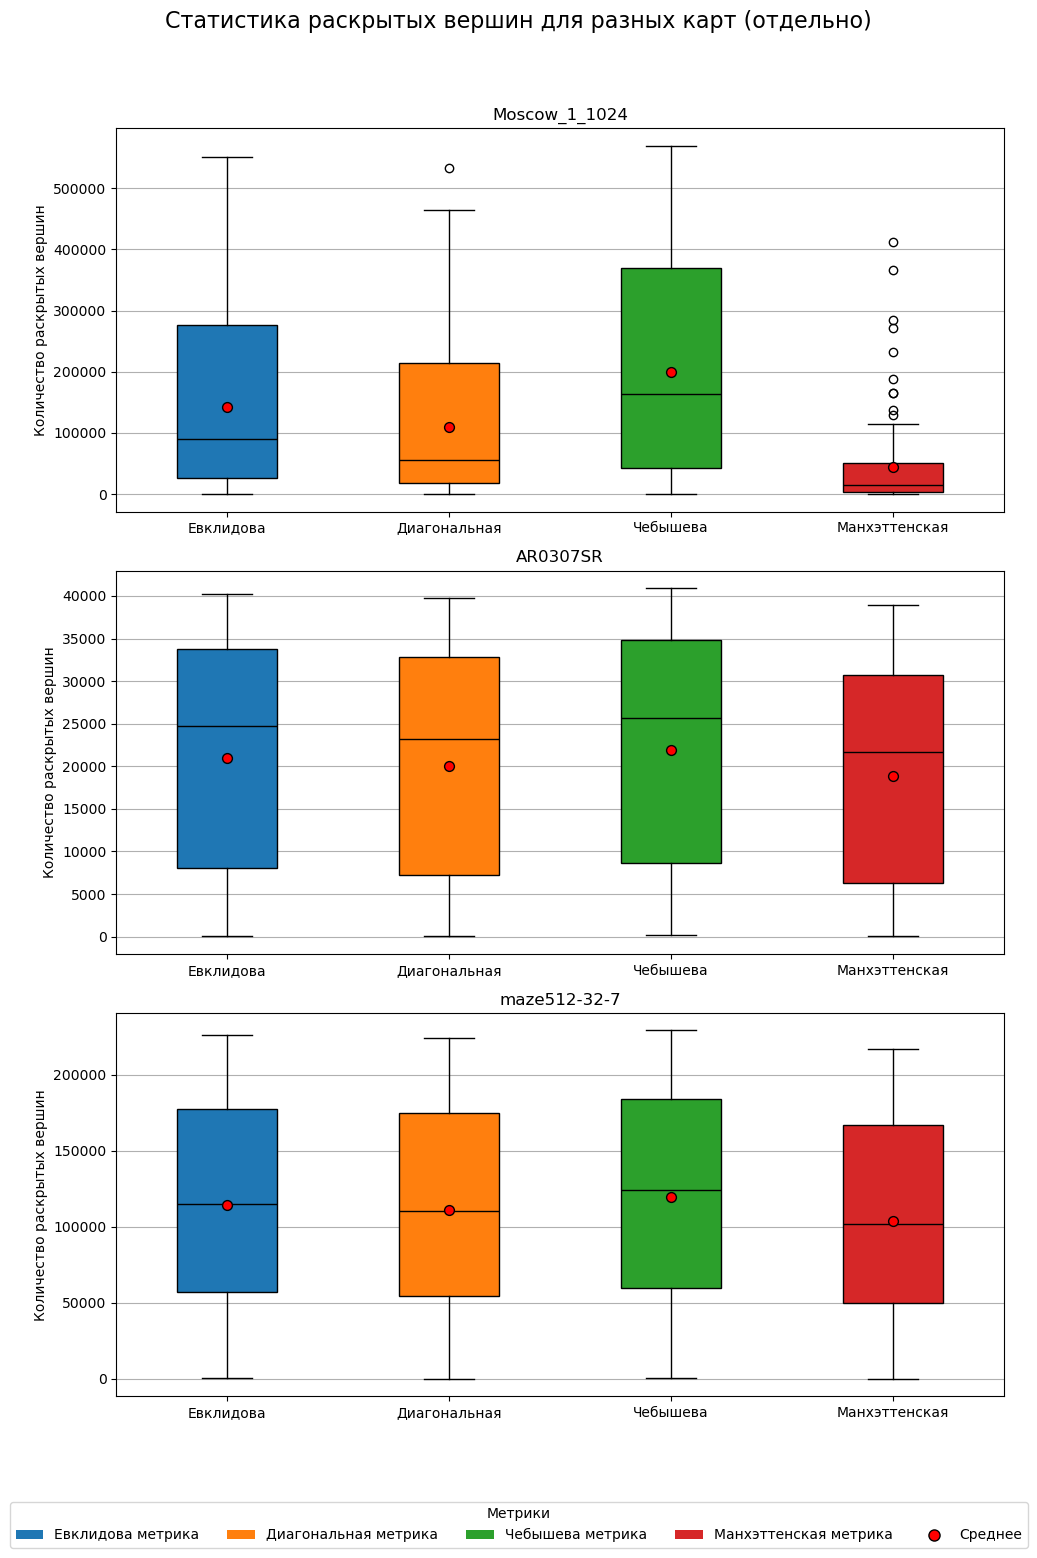

In [56]:
map1_metrics = steps_grouped_tr['Moscow_1_1024.map']
map2_metrics = steps_grouped_tr['AR0307SR.map']
map3_metrics = steps_grouped_tr['maze512-32-7.map']

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

positions = np.array([1, 2, 3, 4])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

def plot_boxplot(ax, data, title):
    bp = ax.boxplot(data, positions=positions, patch_artist=True, medianprops={'color': 'black'})
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    means = [np.mean(metric) for metric in data]
    ax.scatter(positions, means, color='red', edgecolor='black', s=50, zorder=3, label='Среднее')
    
    ax.set_ylabel('Количество раскрытых вершин')
    ax.set_title(title)
    ax.set_xticks(positions)
    ax.set_xticklabels(['Евклидова', 'Диагональная', 'Чебышева', 'Манхэттенская'])
    ax.yaxis.grid(True)

plot_boxplot(ax1, map1_metrics, 'Moscow_1_1024')
plot_boxplot(ax2, map2_metrics, 'AR0307SR')
plot_boxplot(ax3, map3_metrics, 'maze512-32-7')

fig.suptitle('Статистика раскрытых вершин для разных карт (отдельно)', fontsize=16)

legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color) for color in colors]
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markeredgecolor='black', markersize=8, label='Среднее'))

fig.legend(legend_elements, ['Евклидова метрика', 'Диагональная метрика', 'Чебышева метрика', 'Манхэттенская метрика', 'Среднее'], 
           loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5, title='Метрики')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('plots_png/steps3_boxplot_with_means.png')  
plt.show()

### График 8

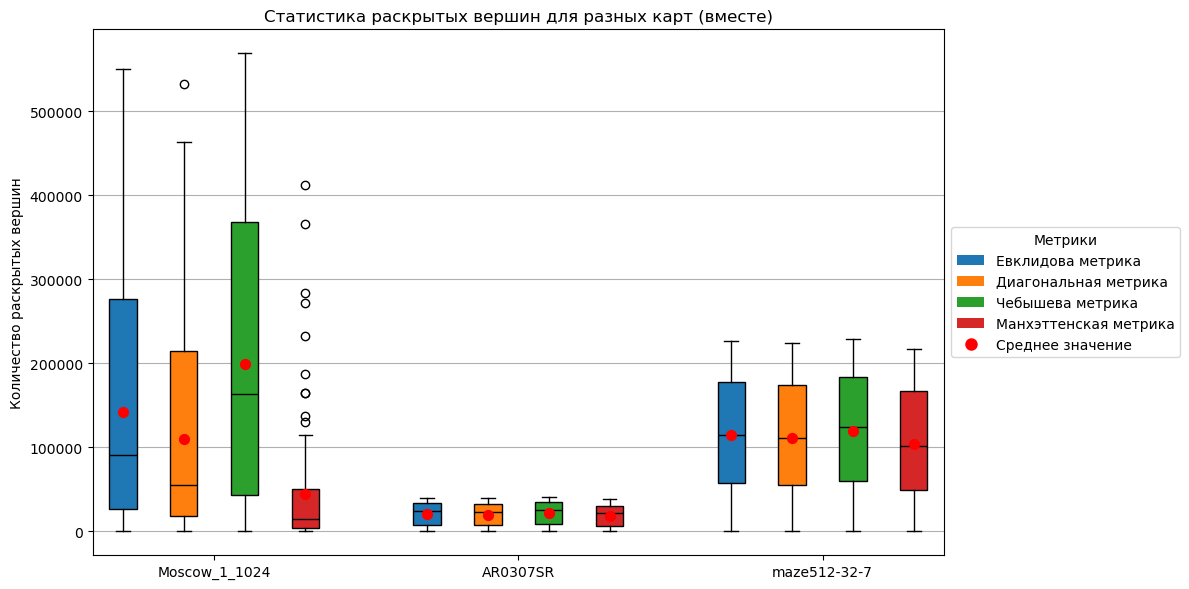

In [57]:
map1_metrics = steps_grouped_tr['Moscow_1_1024.map']
map2_metrics = steps_grouped_tr['AR0307SR.map']
map3_metrics = steps_grouped_tr['maze512-32-7.map']

fig, ax = plt.subplots(figsize=(12, 6))

positions = np.array([1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

bp1 = ax.boxplot(map1_metrics, positions=positions[:4], patch_artist=True, medianprops={'color': 'black'})
bp2 = ax.boxplot(map2_metrics, positions=positions[4:8], patch_artist=True, medianprops={'color': 'black'})
bp3 = ax.boxplot(map3_metrics, positions=positions[8:], patch_artist=True, medianprops={'color': 'black'})

for bplot in (bp1, bp2, bp3):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

for i, map_metrics in enumerate([map1_metrics, map2_metrics, map3_metrics]):
    means = [np.mean(metric) for metric in map_metrics]
    ax.scatter(positions[i*4:(i+1)*4], means, color='red', s=50, zorder=3)

ax.set_xticks([2.5, 7.5, 12.5])
ax.set_xticklabels(['Moscow_1_1024', 'AR0307SR', 'maze512-32-7'])
ax.set_ylabel('Количество раскрытых вершин')

plt.title('Статистика раскрытых вершин для разных карт (вместе)')

legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color) for color in colors]
legend_elements.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10))
ax.legend(legend_elements, ['Евклидова метрика', 'Диагональная метрика', 'Чебышева метрика', 'Манхэттенская метрика', 'Среднее значение'], 
          loc='center left', bbox_to_anchor=(1, 0.5), title='Метрики')

ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('plots_png/steps1_boxplot_with_means.png')  
plt.show()